# Análisis Exploratorio de Datos - Venta de juegos

Este notebook contiene un análisis exploratorio del dataset de Venta de videos Juegos. Vamos a:
- Explorar la estructura de los datos
- Limpiar y preparar los datos
- Realizar análisis estadístico
- Crear visualizaciones
- Identificar patrones y oportunidades de análisis

## 1. Importación de Librerías

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## DETALLES DEL EDA INICIAL

### Descripción del Conjunto de Datos
- **Fuente**: Dataset de clientes de una empresa de telecomunicaciones
- **Contexto**: Contiene información demográfica, servicios contratados y comportamiento de clientes
- **Objetivo**: Identificar patrones de abandono (churn) y características de clientes en riesgo
- **Aplicación**: Retención de clientes y estrategias de marketing dirigido

## 2. Carga de Datos

In [2]:
# Este comando conecta colab con drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Hacemos la conexion con la plantilla de datos a trabajar
path = "/content/drive/MyDrive/ColabTest/Clase Profe/Marchine Learning/Core/BD/ventaGamer.csv"
df = pd.read_csv(path)

## 3. Información General del Dataset

In [4]:
# Información sobre tipos de datos
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Nombres de las columnas
print("Columnas del dataset:")
print(df.columns.tolist())

Columnas del dataset:
['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [6]:
#Revisamos los datos del df
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 4. Limpieza de Nombres de Columnas

In [7]:
# Estandarizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

print("Nombres de columnas actualizados:")
print(df.columns.tolist())

Nombres de columnas actualizados:
['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']


## 5. Análisis de Valores Nulos

In [8]:
 #Identificar si exiten valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64


## 6. Análisis de Duplicados

In [9]:
# Revisar duplicados.
df.duplicated().sum()

np.int64(0)

## 7. Análisis de Espacios Vacíos y Valores Inconsistentes

In [10]:
# Verificar espacios vacíos en columnas de texto
columnas_texto = df.select_dtypes(include=['object']).columns

print("Análisis de espacios vacíos en columnas de texto:")
for col in columnas_texto:
    # Contar espacios vacíos
    espacios_vacios = df[col].astype(str).str.strip().eq('').sum()
    if espacios_vacios > 0:
        print(f"\n{col}: {espacios_vacios} espacios vacíos")

    # Verificar valores únicos (primeros 10)
    valores_unicos = df[col].nunique()
    print(f"{col}: {valores_unicos} valores únicos")
    if valores_unicos < 20:
        print(f"Valores: {df[col].value_counts().head(10).to_dict()}")

Análisis de espacios vacíos en columnas de texto:
name: 11493 valores únicos
platform: 31 valores únicos
genre: 12 valores únicos
Valores: {'Action': 3316, 'Sports': 2346, 'Misc': 1739, 'Role-Playing': 1488, 'Shooter': 1310, 'Adventure': 1286, 'Racing': 1249, 'Platform': 886, 'Simulation': 867, 'Fighting': 848}
publisher: 578 valores únicos


## 8. Estadísticas Descriptivas

In [11]:
# Análisis estadístico descriptivo detallado
print("=== ANÁLISIS ESTADÍSTICO DESCRIPTIVO ===")

# Para variables numéricas
print("\n1. ESTADÍSTICAS DE VARIABLES NUMÉRICAS:")
print("-" * 80)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\n{col}:")
    print(f"  - Media: {df[col].mean():.2f}")
    print(f"  - Mediana: {df[col].median():.2f}")
    print(f"  - Desviación estándar: {df[col].std():.2f}")
    print(f"  - Mínimo: {df[col].min():.2f}")
    print(f"  - Máximo: {df[col].max():.2f}")
    print(f"  - Percentil 25: {df[col].quantile(0.25):.2f}")
    print(f"  - Percentil 75: {df[col].quantile(0.75):.2f}")

# Para variables categóricas
print("\n\n2. ANÁLISIS DE VARIABLES CATEGÓRICAS:")
print("-" * 80)
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(f"  - Valores únicos: {df[col].nunique()}")
    print(f"  - Valor más frecuente: {df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"  - Frecuencia del más común: {df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0}")
    print("  - Top 5 valores:")
    for valor, cuenta in df[col].value_counts().head(5).items():
        print(f"    • {valor}: {cuenta} ({cuenta/len(df)*100:.1f}%)")

=== ANÁLISIS ESTADÍSTICO DESCRIPTIVO ===

1. ESTADÍSTICAS DE VARIABLES NUMÉRICAS:
--------------------------------------------------------------------------------

rank:
  - Media: 8300.61
  - Mediana: 8300.50
  - Desviación estándar: 4791.85
  - Mínimo: 1.00
  - Máximo: 16600.00
  - Percentil 25: 4151.25
  - Percentil 75: 12449.75

year:
  - Media: 2006.41
  - Mediana: 2007.00
  - Desviación estándar: 5.83
  - Mínimo: 1980.00
  - Máximo: 2020.00
  - Percentil 25: 2003.00
  - Percentil 75: 2010.00

na_sales:
  - Media: 0.26
  - Mediana: 0.08
  - Desviación estándar: 0.82
  - Mínimo: 0.00
  - Máximo: 41.49
  - Percentil 25: 0.00
  - Percentil 75: 0.24

eu_sales:
  - Media: 0.15
  - Mediana: 0.02
  - Desviación estándar: 0.51
  - Mínimo: 0.00
  - Máximo: 29.02
  - Percentil 25: 0.00
  - Percentil 75: 0.11

jp_sales:
  - Media: 0.08
  - Mediana: 0.00
  - Desviación estándar: 0.31
  - Mínimo: 0.00
  - Máximo: 10.22
  - Percentil 25: 0.00
  - Percentil 75: 0.04

other_sales:
  - Media: 0.05

In [12]:
# Estadísticas para variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
df.describe().T

Estadísticas descriptivas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
na_sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
eu_sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
jp_sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
other_sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
global_sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [13]:
# Crear una copia del dataframe para trabajar
df_limpio = df.copy()

# Identificar columnas numéricas y categóricas
columnas_numericas = df_limpio.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = df_limpio.select_dtypes(include=['object']).columns

print(f"Columnas numéricas: {list(columnas_numericas)}")
print(f"Columnas categóricas: {list(columnas_categoricas)}")

Columnas numéricas: ['rank', 'year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
Columnas categóricas: ['name', 'platform', 'genre', 'publisher']


## 9. Imputación de Valores Faltantes

In [14]:
# Imputación de valores numéricos con la media
print("Imputando valores numéricos...")
valores_imputados_total = 0

for col in columnas_numericas:
    nulos = df_limpio[col].isnull().sum()
    if nulos > 0:
        media = df_limpio[col].mean()
        df_limpio[col].fillna(media, inplace=True)
        print(f"  - {col}: Se imputaron {nulos} valores con la media = {media:.2f}")
        valores_imputados_total += nulos

if valores_imputados_total == 0:
    print("  - No se encontraron valores nulos en columnas numéricas")

Imputando valores numéricos...
  - year: Se imputaron 271 valores con la media = 2006.41


/tmp/ipython-input-14-588704012.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(media, inplace=True)


In [15]:
# Imputación de valores categóricos con la moda
for col in columnas_categoricas:
    if df_limpio[col].isnull().sum() > 0:
        moda = df_limpio[col].mode()[0] if len(df_limpio[col].mode()) > 0 else 'Desconocido'
        valores_imputados = df_limpio[col].isnull().sum()
        df_limpio[col].fillna(moda, inplace=True)
        print(f"{col}: Se imputaron {valores_imputados} valores con la moda = '{moda}'")

    # Reemplazar espacios vacíos
    espacios_vacios = df_limpio[col].astype(str).str.strip().eq('').sum()
    if espacios_vacios > 0:
        df_limpio[col] = df_limpio[col].replace('', 'Desconocido')
        print(f"{col}: Se reemplazaron {espacios_vacios} espacios vacíos con 'Desconocido'")

publisher: Se imputaron 58 valores con la moda = 'Electronic Arts'


/tmp/ipython-input-15-1177387014.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


In [16]:
# Revisamos los NaN si hay
filas_con_nan = df_limpio[df_limpio.isnull().any(axis=1)]

print("Filas que contienen al menos un valor NaN:")
print(filas_con_nan)

# También puedes verificar el total de NaN por columna
print("\nTotal de valores NaN por columna:")
print(df_limpio.isnull().sum())

# O simplemente verificar si hay algún NaN
total_nan = df_limpio.isnull().sum().sum()
print(f"\nTotal de valores NaN en todo el dataset: {total_nan}")


Filas que contienen al menos un valor NaN:
Empty DataFrame
Columns: [rank, name, platform, year, genre, publisher, na_sales, eu_sales, jp_sales, other_sales, global_sales]
Index: []

Total de valores NaN por columna:
rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

Total de valores NaN en todo el dataset: 0


In [17]:
#Cambiamos el año que esta float a int
df_limpio['year'] = df_limpio['year'].astype('int64')
print("Cambio de type en year:")
print(df_limpio.info())

Cambio de type en year:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16598 non-null  int64  
 4   genre         16598 non-null  object 
 5   publisher     16598 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB
None


In [18]:
# Verificar que no quedan valores nulos
print("\nVerificación final de valores nulos:")
print(f"Total de valores nulos después de la imputación: {df_limpio.isnull().sum().sum()}")


Verificación final de valores nulos:
Total de valores nulos después de la imputación: 0


## 10. Análisis de Outliers

In [19]:
# Identificar outliers usando el método IQR
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Analizar outliers para cada columna numérica
print("Análisis de Outliers por columna:")
for col in columnas_numericas:
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(df_limpio, col)
    porcentaje_outliers = (len(outliers) / len(df_limpio)) * 100

    print(f"\n{col}:")
    print(f"  - Outliers: {len(outliers)} ({porcentaje_outliers:.2f}%)")
    print(f"  - Límites: [{lim_inf:.2f}, {lim_sup:.2f}]")
    print(f"  - Rango de valores: [{df_limpio[col].min():.2f}, {df_limpio[col].max():.2f}]")

Análisis de Outliers por columna:

rank:
  - Outliers: 0 (0.00%)
  - Límites: [-8296.50, 24897.50]
  - Rango de valores: [1.00, 16600.00]

year:
  - Outliers: 305 (1.84%)
  - Límites: [1992.50, 2020.50]
  - Rango de valores: [1980.00, 2020.00]

na_sales:
  - Outliers: 1681 (10.13%)
  - Límites: [-0.36, 0.60]
  - Rango de valores: [0.00, 41.49]

eu_sales:
  - Outliers: 2081 (12.54%)
  - Límites: [-0.17, 0.28]
  - Rango de valores: [0.00, 29.02]

jp_sales:
  - Outliers: 2425 (14.61%)
  - Límites: [-0.06, 0.10]
  - Rango de valores: [0.00, 10.22]

other_sales:
  - Outliers: 1665 (10.03%)
  - Límites: [-0.06, 0.10]
  - Rango de valores: [0.00, 10.57]

global_sales:
  - Outliers: 1893 (11.40%)
  - Límites: [-0.55, 1.08]
  - Rango de valores: [0.01, 82.74]


=== TRANSFORMACIÓN LOGARÍTMICA PARA OUTLIERS ===

na_sales:
   Original: min=0.00, max=41.49
   Log transform: min=0.00, max=3.75

eu_sales:
   Original: min=0.00, max=29.02
   Log transform: min=0.00, max=3.40

jp_sales:
   Original: min=0.00, max=10.22
   Log transform: min=0.00, max=2.42

other_sales:
   Original: min=0.00, max=10.57
   Log transform: min=0.00, max=2.45

global_sales:
   Original: min=0.01, max=82.74
   Log transform: min=0.01, max=4.43


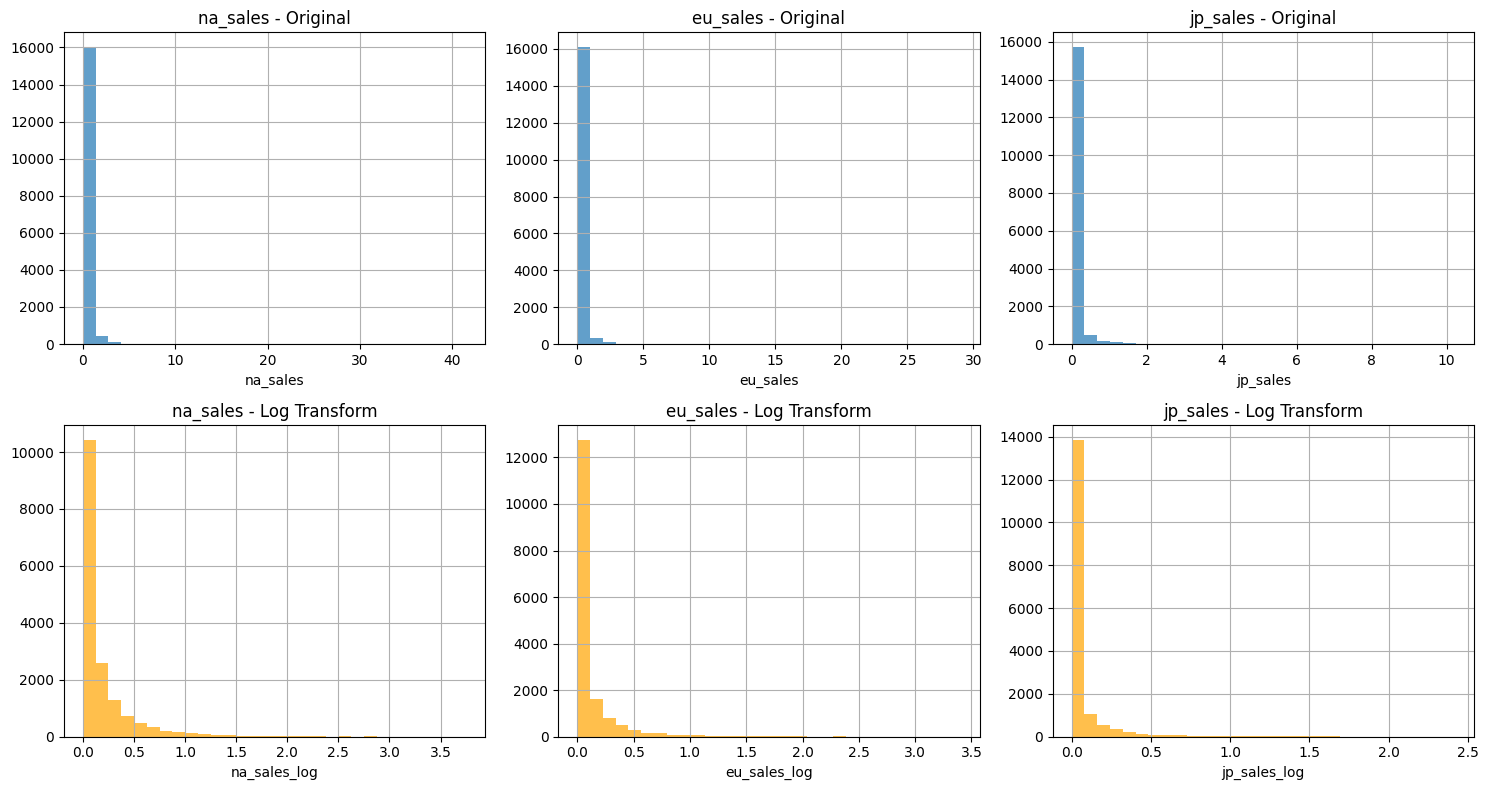


 Transformación logarítmica aplicada
💡 Esta transformación normaliza la distribución y reduce el impacto de outliers


In [21]:
# Transformación logarítmica para manejar outliers naturalmente
print("=== TRANSFORMACIÓN LOGARÍTMICA PARA OUTLIERS ===")

# Aplicar log1p (log(x+1)) para manejar valores 0
df_log_transform = df_limpio.copy()
ventas_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']

for col in ventas_cols:
    df_log_transform[f'{col}_log'] = np.log1p(df_log_transform[col])

    # Mostrar antes y después
    print(f"\n{col}:")
    print(f"   Original: min={df_log_transform[col].min():.2f}, max={df_log_transform[col].max():.2f}")
    print(f"   Log transform: min={df_log_transform[f'{col}_log'].min():.2f}, max={df_log_transform[f'{col}_log'].max():.2f}")

# Verificar distribución después de transformación
plt.figure(figsize=(15, 8))

for i, col in enumerate(ventas_cols[:3], 1):  # Solo primeras 3 para visualización
    plt.subplot(2, 3, i)
    df_limpio[col].hist(bins=30, alpha=0.7, label='Original')
    plt.title(f'{col} - Original')
    plt.xlabel(col)

    plt.subplot(2, 3, i+3)
    df_log_transform[f'{col}_log'].hist(bins=30, alpha=0.7, label='Log', color='orange')
    plt.title(f'{col} - Log Transform')
    plt.xlabel(f'{col}_log')

plt.tight_layout()
plt.show()

print("\n Transformación logarítmica aplicada")
print("💡 Esta transformación normaliza la distribución y reduce el impacto de outliers")

## 11. Visualizaciones Exploratorias

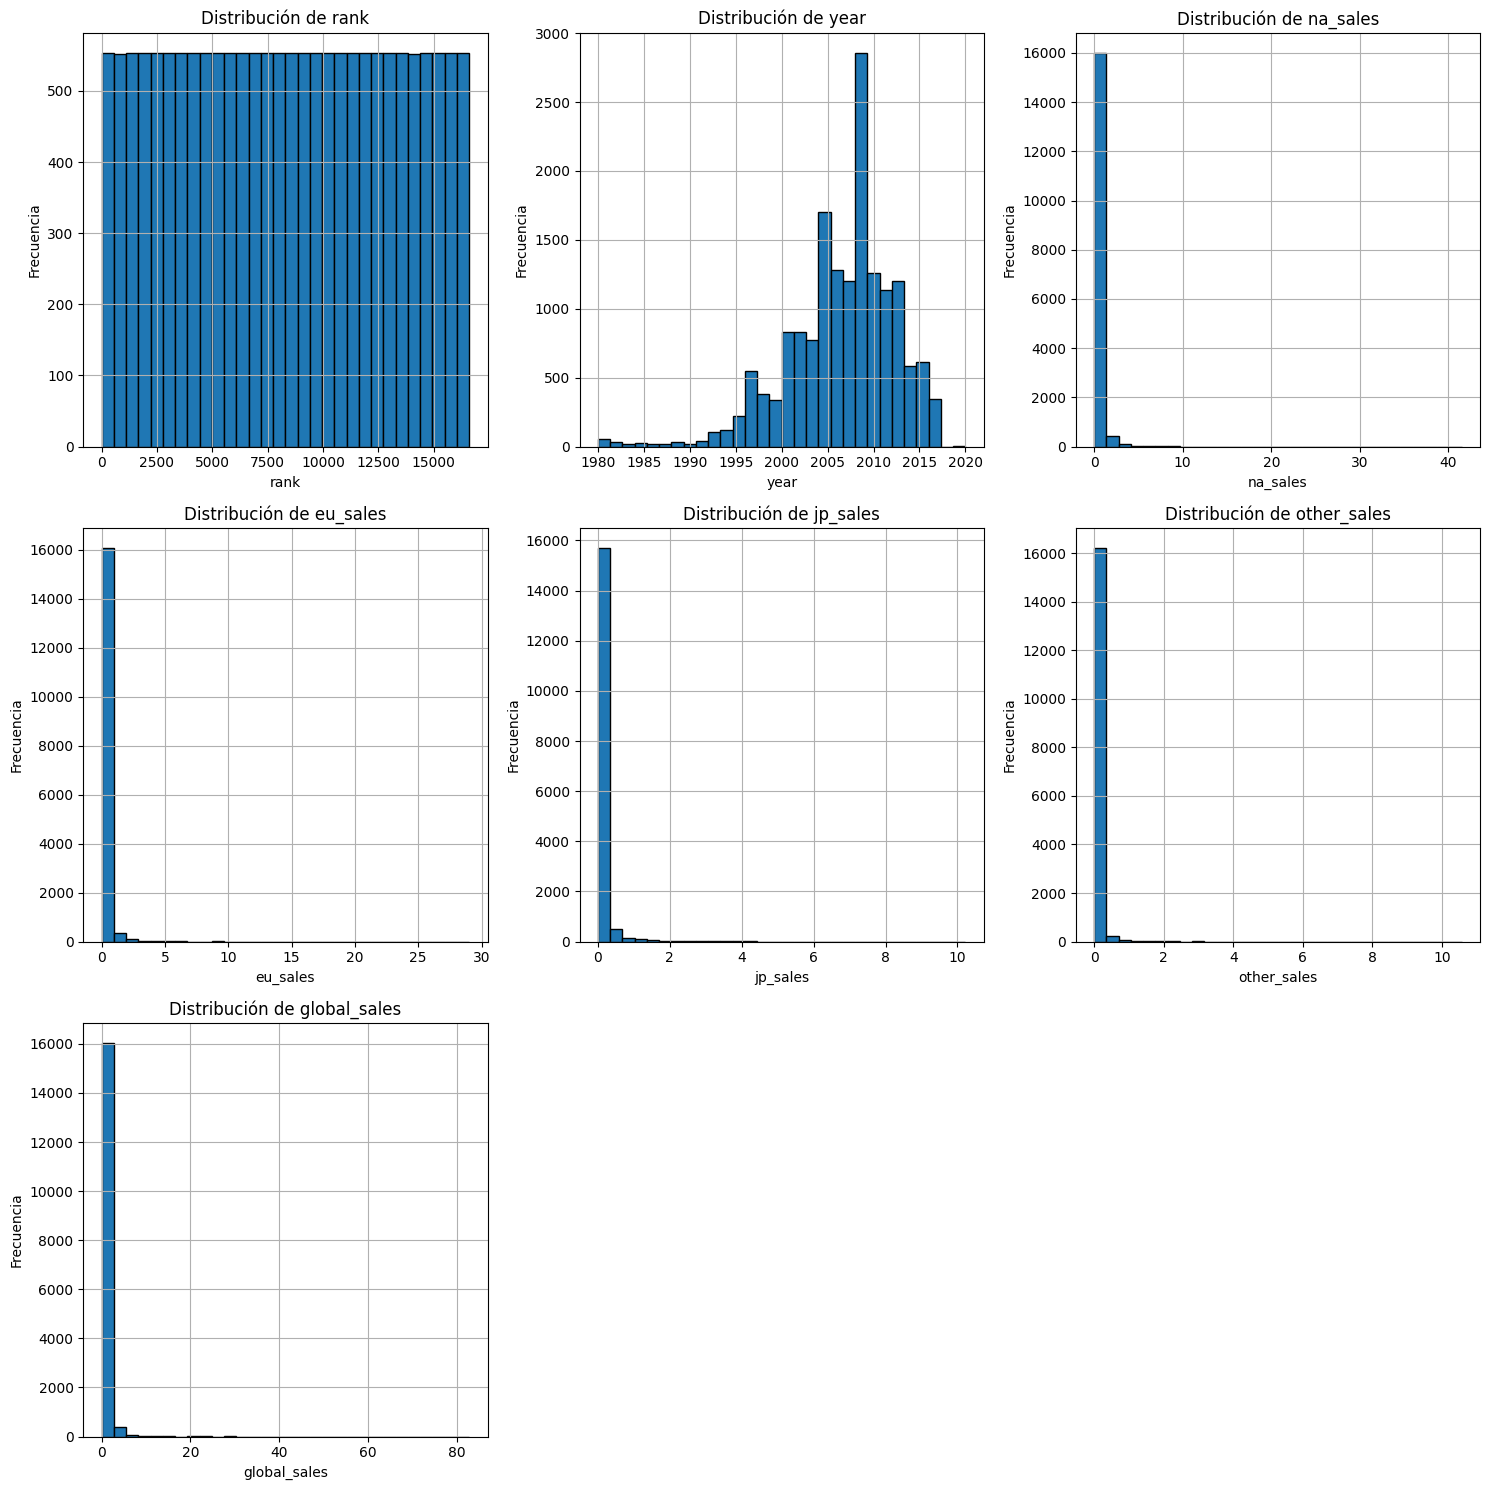

In [22]:
# Histogramas para variables numéricas
if len(columnas_numericas) > 0:
    n_cols = min(3, len(columnas_numericas))
    n_rows = (len(columnas_numericas) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_numericas):
        if i < len(axes):
            df_limpio[col].hist(bins=30, ax=axes[i], edgecolor='black')
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for i in range(len(columnas_numericas), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables numéricas para graficar")

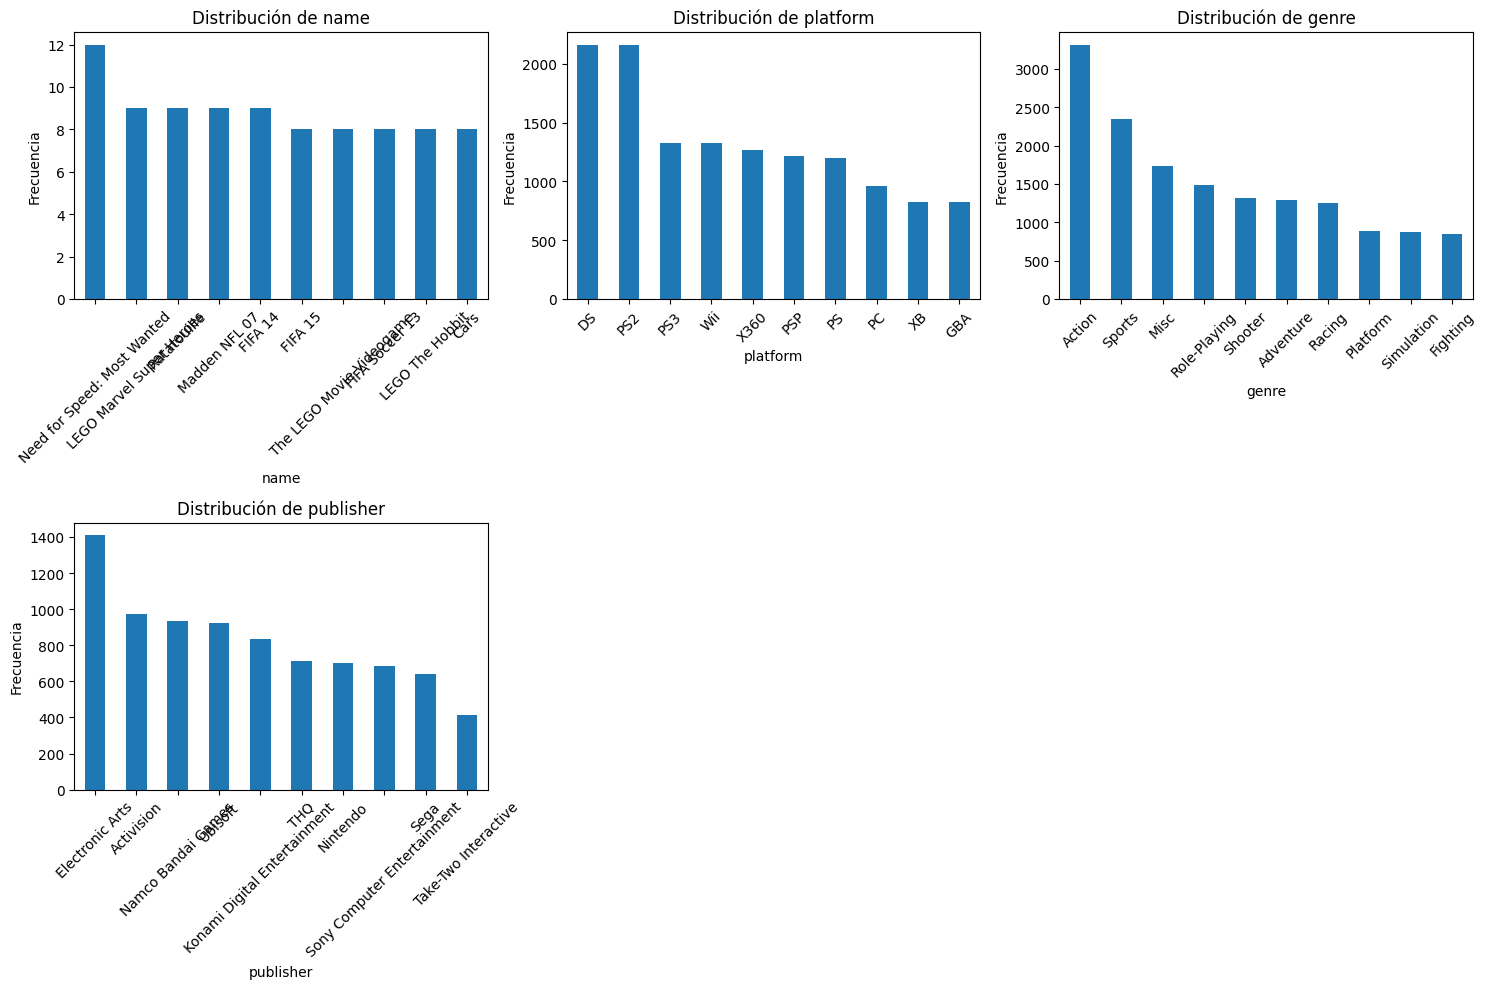

In [23]:
# Gráficos de barras para variables categóricas
if len(columnas_categoricas) > 0:
    # Seleccionar solo las primeras columnas categóricas si hay muchas
    cols_to_plot = list(columnas_categoricas)[:6]  # Máximo 6 gráficos

    n_cols = min(3, len(cols_to_plot))
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(cols_to_plot):
        if i < len(axes):
            # Mostrar solo las 10 categorías más frecuentes
            top_values = df_limpio[col].value_counts().head(10)
            top_values.plot(kind='bar', ax=axes[i], rot=45)
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for i in range(len(cols_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables categóricas para graficar")

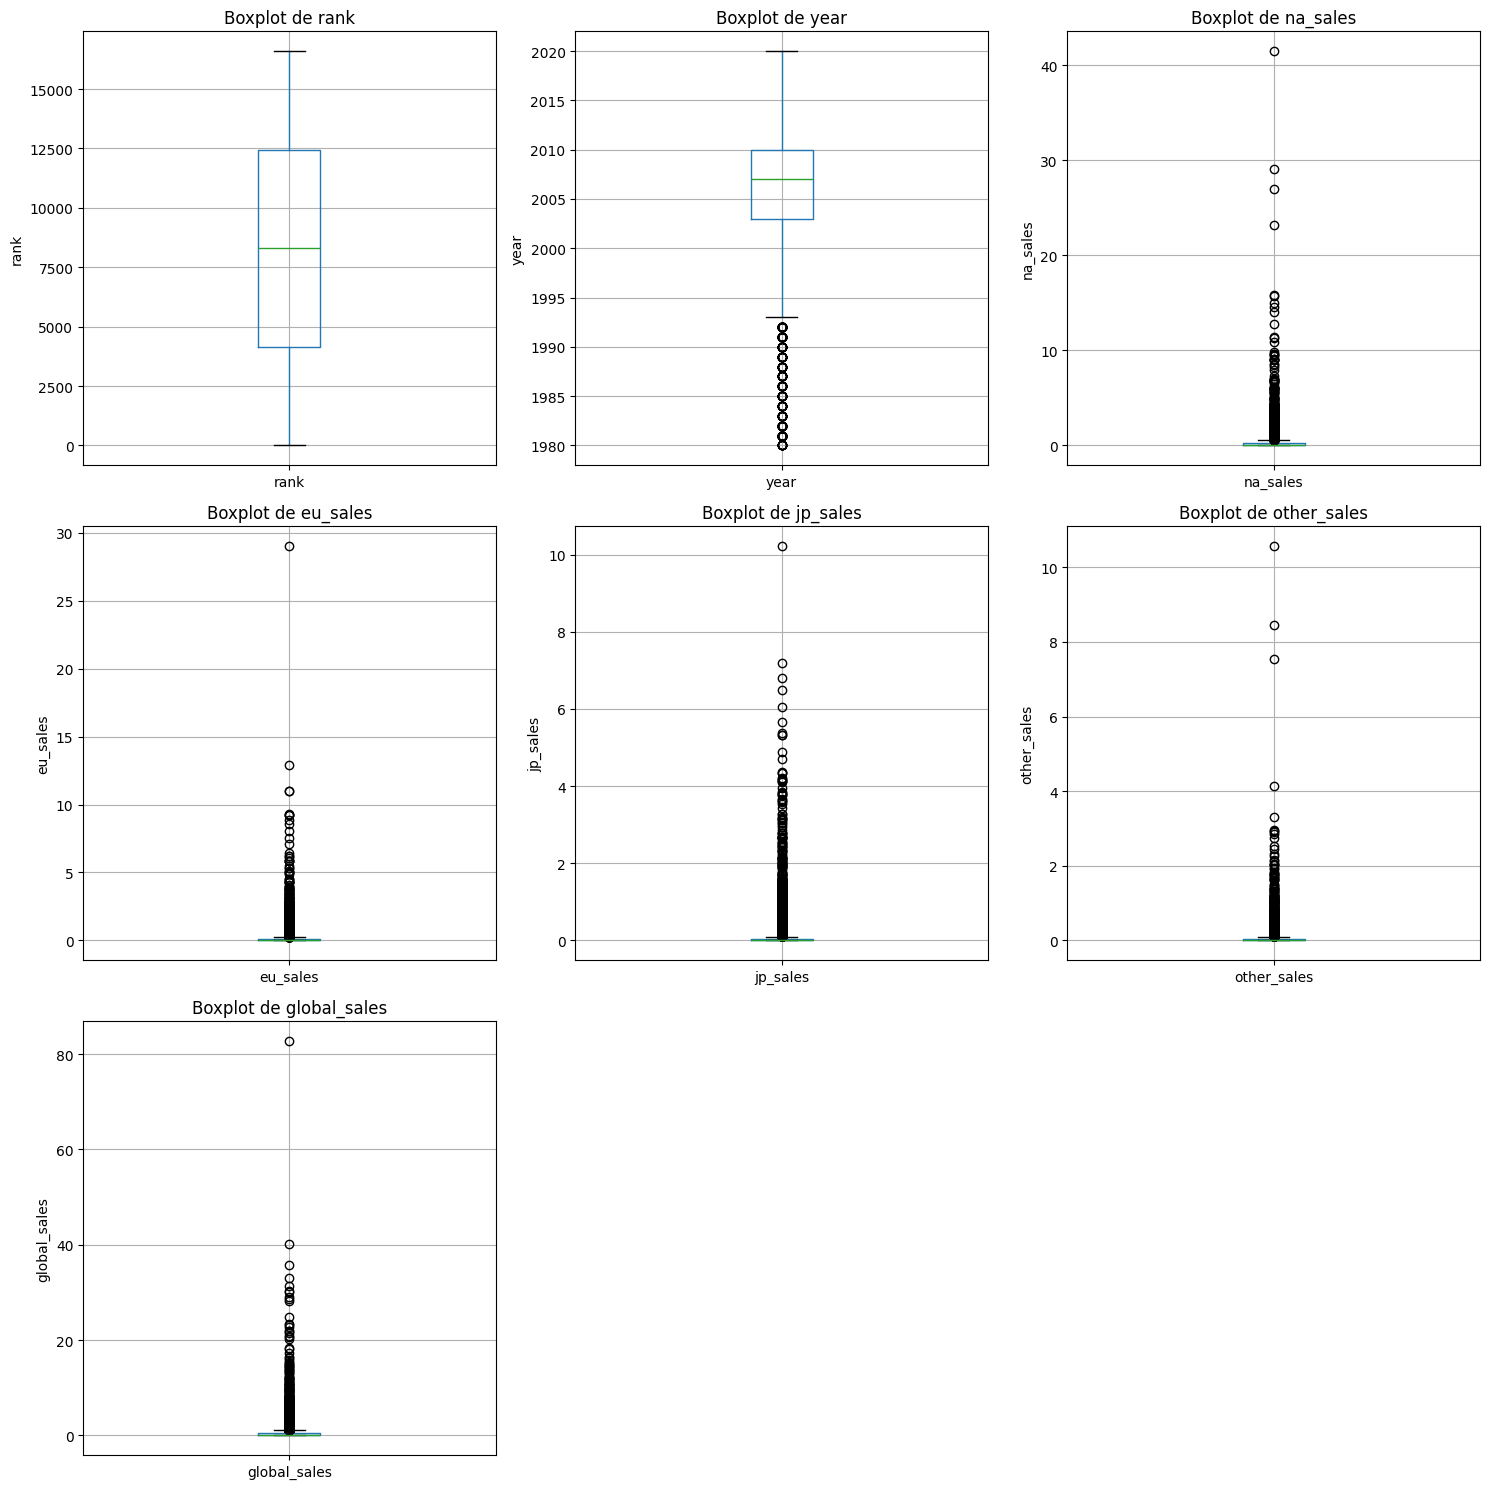

In [24]:
# Boxplots para detectar outliers
if len(columnas_numericas) > 0:
    n_cols = min(3, len(columnas_numericas))
    n_rows = (len(columnas_numericas) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_numericas):
        if i < len(axes):
            df_limpio.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Boxplot de {col}')
            axes[i].set_ylabel(col)

    # Ocultar ejes vacíos
    for i in range(len(columnas_numericas), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables numéricas para boxplots")

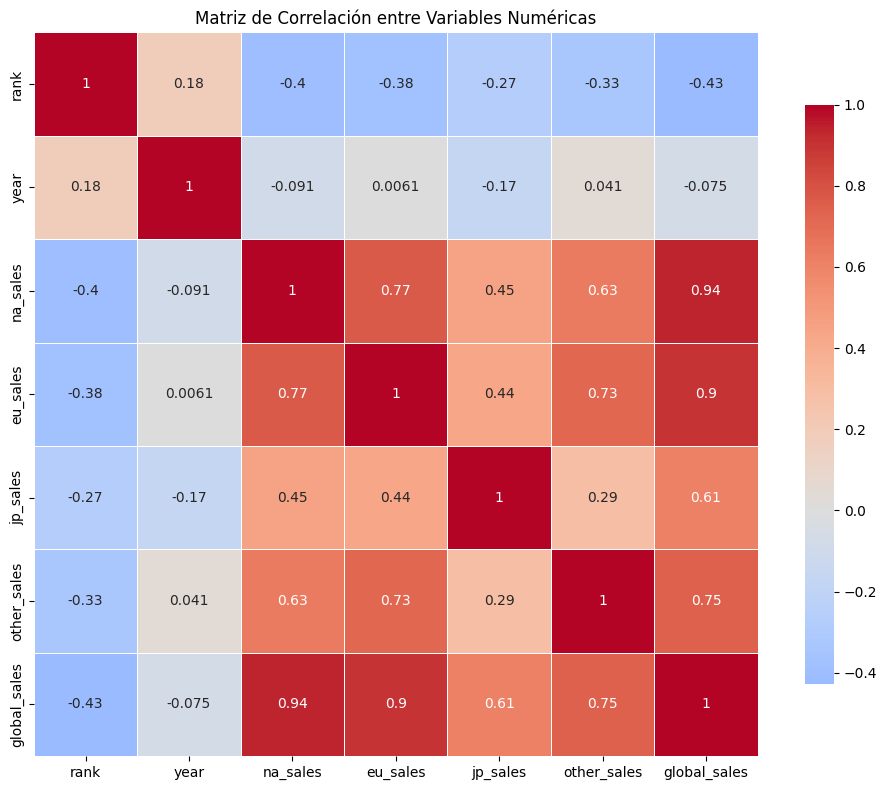

In [25]:
# Matriz de correlación
if len(columnas_numericas) > 1:
    plt.figure(figsize=(10, 8))
    matriz_corr = df_limpio[columnas_numericas].corr()
    sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlación entre Variables Numéricas')
    plt.tight_layout()
    plt.show()
else:
    print("Se necesitan al menos 2 variables numéricas para la matriz de correlación")

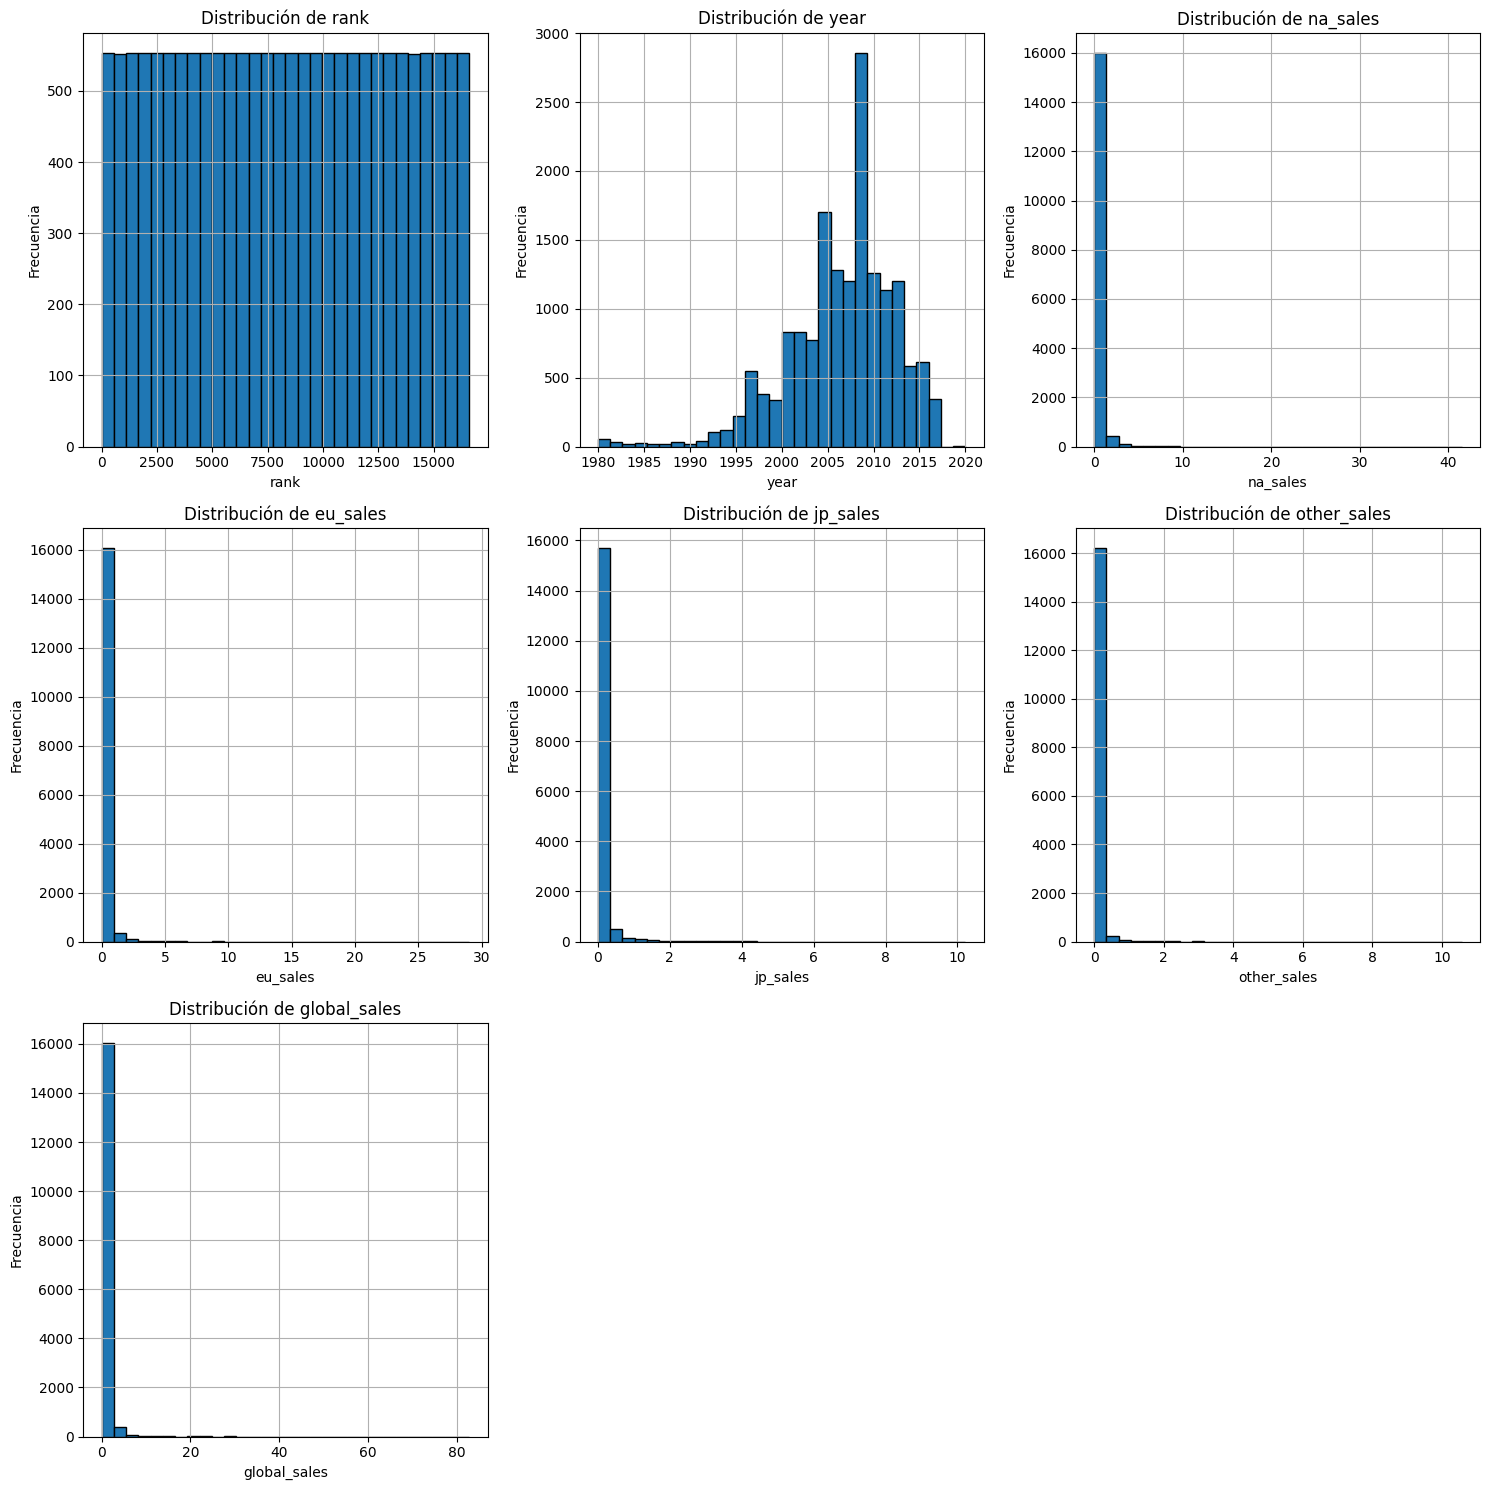

In [26]:
# Distribución de variables numéricas
if len(columnas_numericas) > 0:
    n_cols = min(3, len(columnas_numericas))
    n_rows = (len(columnas_numericas) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_numericas):
        if i < len(axes):
            df_limpio[col].hist(bins=30, ax=axes[i], edgecolor='black')
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for i in range(len(columnas_numericas), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

## 13. Matriz de Correlación

In [27]:
# Ver todas las columnas
print("Columnas:")
print(df_limpio.columns.tolist())

# Ver columnas con solo 2 valores (posible churn)
for col in df_limpio.columns:
    if df_limpio[col].nunique() == 2:
          print(f"\n{col}:")
          print(df_limpio[col].value_counts())

Columnas:
['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']


In [28]:
# Ver géneros de videojuegos
print("Géneros:")
print(df_limpio['genre'].value_counts())

# Ver plataformas
print("\nPlataformas:")
print(df_limpio['platform'].value_counts())

# Ver años
print("\nAños:")
print(df_limpio['year'].value_counts().sort_index())

Géneros:
genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

Plataformas:
platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Años:
year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     


Columnas relacionadas con ventas: ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']


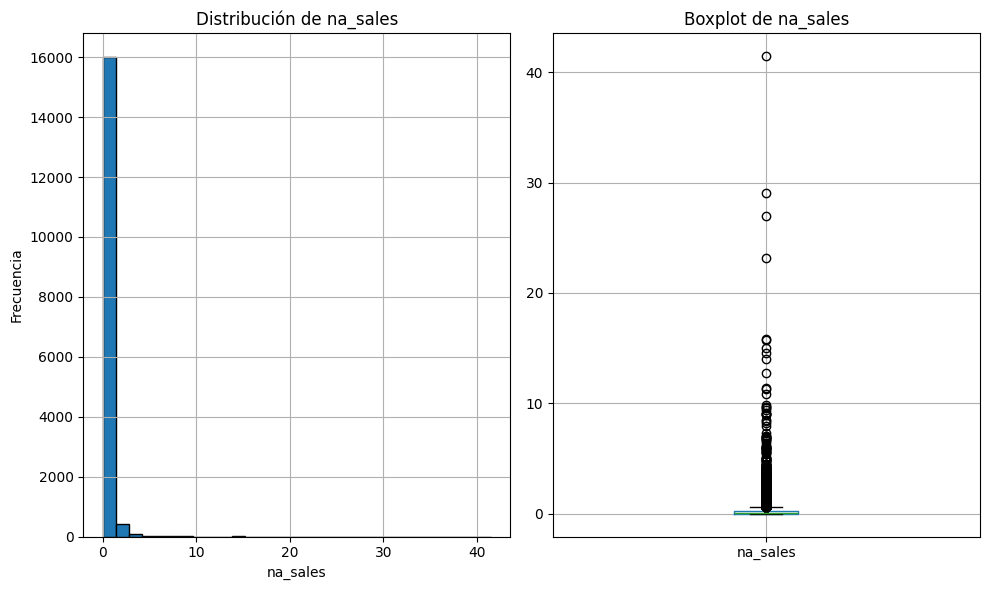

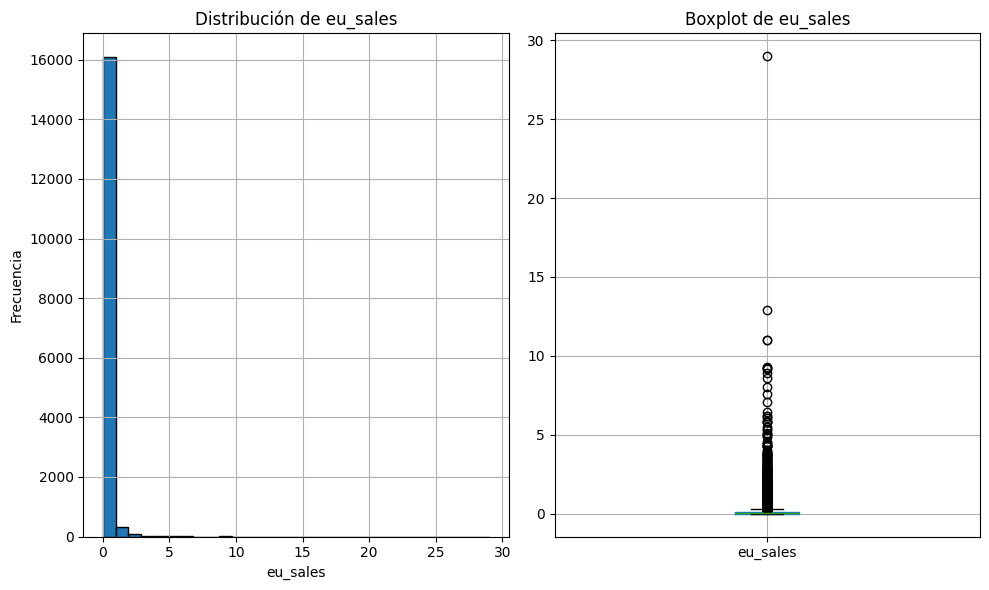

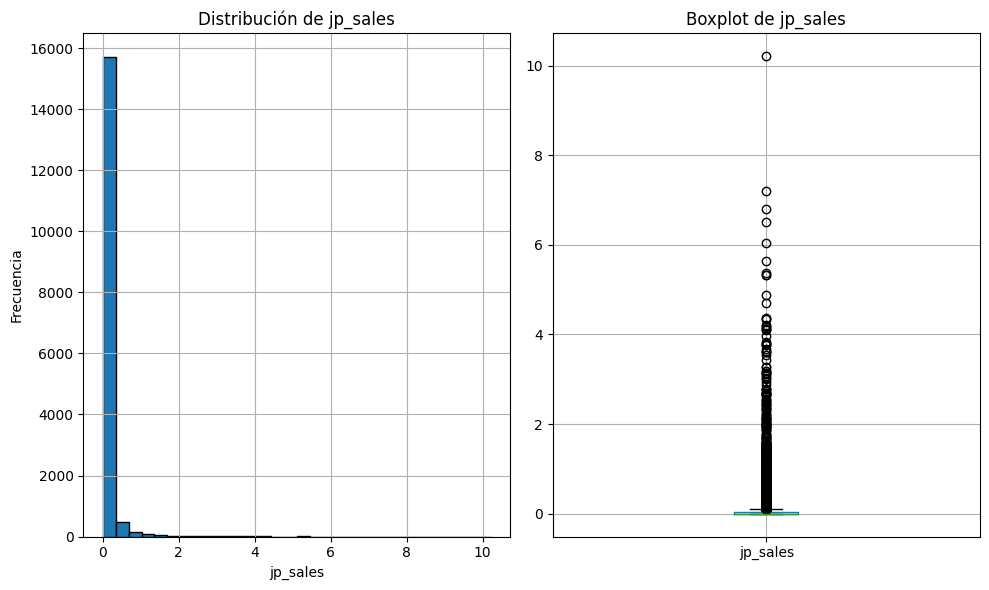

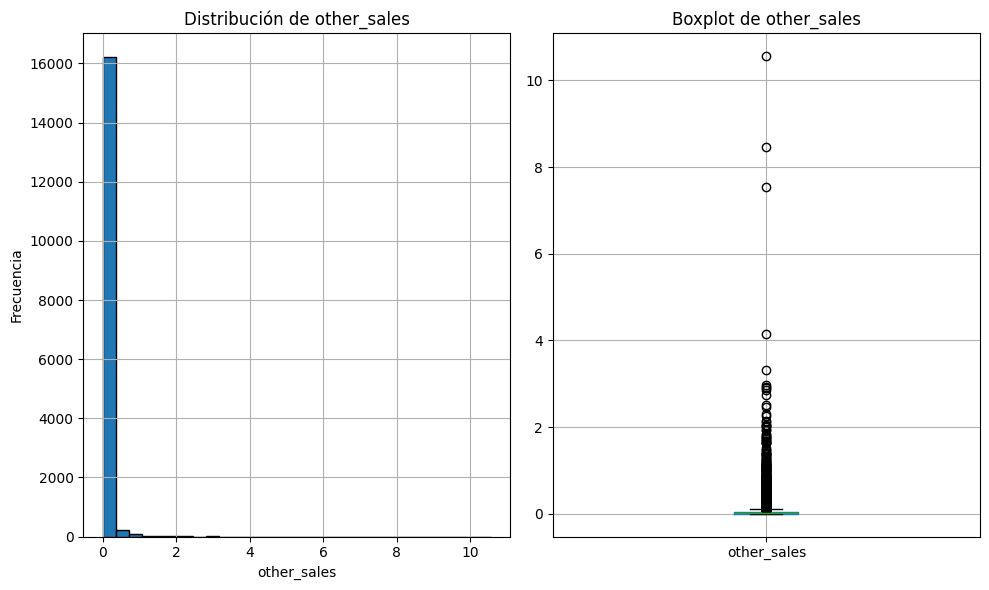

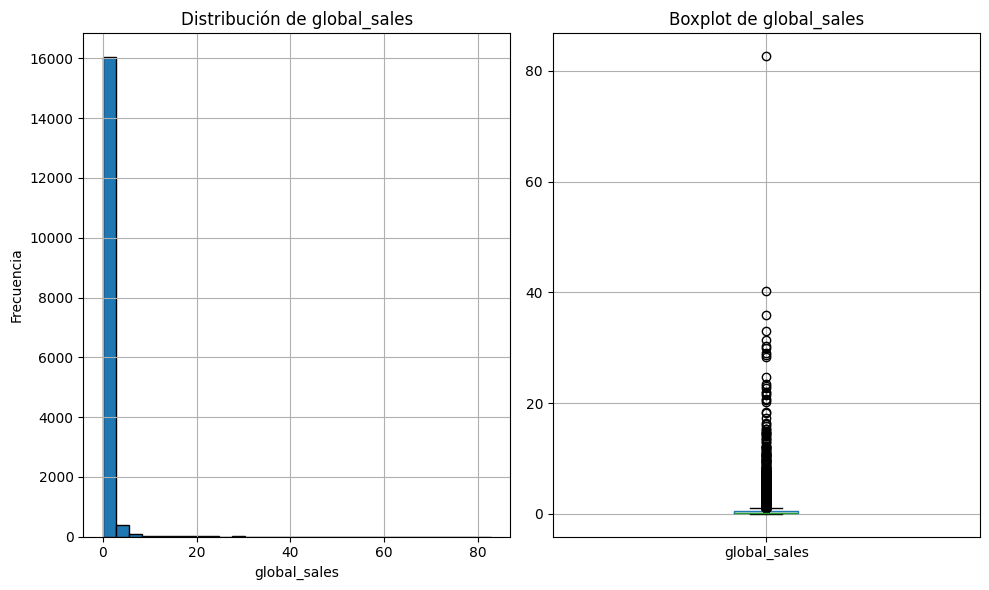


Columnas relacionadas con plataformas: ['platform']

Distribución de platform:
platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64


In [29]:
# Buscar columnas relacionadas con ventas
columnas_ventas = [col for col in df_limpio.columns if any(word in col.lower() for word in ['sales', 'ventas', 'global', 'total'])]

if columnas_ventas:
    print(f"\nColumnas relacionadas con ventas: {columnas_ventas}")

    # Analizar distribución de ventas si existen
    for col in columnas_ventas:
        if col in columnas_numericas:
            plt.figure(figsize=(10, 6))
            plt.subplot(1, 2, 1)
            df_limpio[col].hist(bins=30, edgecolor='black')
            plt.title(f'Distribución de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')

            plt.subplot(1, 2, 2)
            df_limpio.boxplot(column=col)
            plt.title(f'Boxplot de {col}')
            plt.tight_layout()
            plt.show()

# Buscar columnas relacionadas con plataformas
columnas_plataforma = [col for col in df_limpio.columns if any(word in col.lower() for word in ['platform', 'plataforma', 'console', 'consola'])]

if columnas_plataforma:
    print(f"\nColumnas relacionadas con plataformas: {columnas_plataforma}")
    for col in columnas_plataforma:
        print(f"\nDistribución de {col}:")
        print(df_limpio[col].value_counts().head(10))

## 15. Resumen de Hallazgos

In [30]:
# Matriz de correlación para variables numéricas
if len(columnas_numericas) > 1:
    matriz_corr = df_limpio[columnas_numericas].corr()

    # Identificar correlaciones fuertes
    print("\\nCorrelaciones fuertes (|r| > 0.7):")
    for i in range(len(matriz_corr.columns)):
        for j in range(i+1, len(matriz_corr.columns)):
            if abs(matriz_corr.iloc[i, j]) > 0.7:
                print(f"{matriz_corr.columns[i]} - {matriz_corr.columns[j]}: {matriz_corr.iloc[i, j]:.3f}")

\nCorrelaciones fuertes (|r| > 0.7):
na_sales - eu_sales: 0.768
na_sales - global_sales: 0.941
eu_sales - other_sales: 0.726
eu_sales - global_sales: 0.903
other_sales - global_sales: 0.748


## RESUMEN DE HALLAZGOS DEL EDA

In [ ]:
print("=== IDENTIFICACIÓN DE PROBLEMÁTICA A ABORDAR ===")

print("\nBasado en el análisis del dataset de videojuegos, las problemáticas posibles son:")

print("\n 1. REGRESIÓN - PREDICCIÓN DE VENTAS GLOBALES")
print("   - Variable objetivo: global_sales")
print("   - Predecir las ventas totales de un videojuego")
print("   - Características predictoras: género, plataforma, año, publisher")
print("   - Útil para: Estimación de ingresos, planificación de producción")

print("\n 2. CLASIFICACIÓN - ÉXITO COMERCIAL")
print("   - Crear categorías: Éxito Alto/Medio/Bajo basado en ventas")
print("   - Predecir si un juego será exitoso antes del lanzamiento")
print("   - Útil para: Decisiones de inversión, estrategias de marketing")

print("\n 3. CLUSTERING - SEGMENTACIÓN DE JUEGOS")
print("   - Agrupar juegos similares por ventas en diferentes regiones")
print("   - Identificar patrones de preferencias geográficas")
print("   - Útil para: Estrategias de mercado regional")

print("\n RECOMENDACIÓN PRINCIPAL: REGRESIÓN")
print("   Problema: Predecir VENTAS GLOBALES")
print("   Variable objetivo clara: global_sales")
print("   Variables predictoras útiles: género, plataforma, año")
print("   Aplicación práctica inmediata")
print("   Resultados fáciles de interpretar")

print("\n CARACTERÍSTICAS DEL PROBLEMA:")
print(f"   - Dataset: {len(df_limpio)} videojuegos")
print(f"   - Variable objetivo: Ventas continuas (regresión)")
print(f"   - Predictores categóricos: genre, platform, publisher")
print(f"   - Predictores numéricos: year, ventas regionales")

=== IDENTIFICACIÓN DE PROBLEMÁTICA A ABORDAR ===

Basado en el análisis del dataset de videojuegos, las problemáticas posibles son:

 1. REGRESIÓN - PREDICCIÓN DE VENTAS GLOBALES
   - Variable objetivo: global_sales
   - Predecir las ventas totales de un videojuego
   - Características predictoras: género, plataforma, año, publisher
   - Útil para: Estimación de ingresos, planificación de producción

 2. CLASIFICACIÓN - ÉXITO COMERCIAL
   - Crear categorías: Éxito Alto/Medio/Bajo basado en ventas
   - Predecir si un juego será exitoso antes del lanzamiento
   - Útil para: Decisiones de inversión, estrategias de marketing

 3. CLUSTERING - SEGMENTACIÓN DE JUEGOS
   - Agrupar juegos similares por ventas en diferentes regiones
   - Identificar patrones de preferencias geográficas
   - Útil para: Estrategias de mercado regional

 RECOMENDACIÓN PRINCIPAL: REGRESIÓN
   Problema: Predecir VENTAS GLOBALES
   Variable objetivo clara: global_sales
   Variables predictoras útiles: género, platafo

In [ ]:
print("=== RECOMENDACIONES ===")
print("\n1. PREPARACIÓN DE DATOS:")
print("   - Los datos ya han sido limpiados e imputados")
print("   - Encoding de variables categóricas: genre, platform, publisher")
print("   - Normalizar variables de ventas si hay diferencias de escala")

print("\n2. FEATURE ENGINEERING:")
print("   - Crear variable 'edad_juego' basada en el año actual - year")
print("   - Calcular ratio de ventas por región (ej: na_sales/global_sales)")
print("   - Crear indicador de 'juego_reciente' (últimos 5 años)")
print("   - Agrupar publishers menos frecuentes en 'Otros'")

print("\n3. MODELADO:")
print("   - Para regresión: Random Forest, XGBoost, Linear Regression")
print("   - Para clasificación: Logistic Regression, SVM, Decision Trees")
print("   - Validar con métricas apropiadas (MAE, RMSE, R²)")

print("\n4. RECOMENDACIÓN PRINCIPAL:")
print("   - Problema de REGRESIÓN para predecir VENTAS GLOBALES")
print("   - Es el problema más valioso para la industria")
print("   - Permite estimación de ingresos y planificación")

print("\n5. VARIABLES CLAVE IDENTIFICADAS:")
print(f"   - Variable objetivo: global_sales")
print(f"   - Predictores principales: genre, platform, year")
print(f"   - Variables de apoyo: ventas regionales, publisher")

# Guardar el dataset limpio
df_limpio.to_csv('videos_juegos_limpio.csv', index=False)
print("\n Dataset limpio guardado como 'videos_juegos_limpio.csv'")

=== RECOMENDACIONES ===

1. PREPARACIÓN DE DATOS:
   - Los datos ya han sido limpiados e imputados
   - Encoding de variables categóricas: genre, platform, publisher
   - Normalizar variables de ventas si hay diferencias de escala

2. FEATURE ENGINEERING:
   - Crear variable 'edad_juego' basada en el año actual - year
   - Calcular ratio de ventas por región (ej: na_sales/global_sales)
   - Crear indicador de 'juego_reciente' (últimos 5 años)
   - Agrupar publishers menos frecuentes en 'Otros'

3. MODELADO:
   - Para regresión: Random Forest, XGBoost, Linear Regression
   - Para clasificación: Logistic Regression, SVM, Decision Trees
   - Validar con métricas apropiadas (MAE, RMSE, R²)

4. RECOMENDACIÓN PRINCIPAL:
   - Problema de REGRESIÓN para predecir VENTAS GLOBALES
   - Es el problema más valioso para la industria
   - Permite estimación de ingresos y planificación

5. VARIABLES CLAVE IDENTIFICADAS:
   - Variable objetivo: global_sales
   - Predictores principales: genre, platform

## 16. Importación de Librerías para Machine Learning

In [31]:
# Librerías básicas para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [32]:
# Preparación básica de datos para ML
print("=== PREPARACIÓN DE DATOS ===")

# Variable objetivo: queremos predecir las ventas globales
target = 'global_sales'
print(f" Vamos a predecir: {target}")

# Variables que vamos a usar para predecir
features = ['platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
print(f"Variables predictoras: {features}")

# Crear X (características) e y (objetivo)
X = df_limpio[features].copy()
y = df_limpio[target].copy()

print(f"\n Tenemos {X.shape[0]} juegos y {X.shape[1]} características")
print(f" Rango de ventas: {y.min():.2f} - {y.max():.2f} millones")

# Convertir variables categóricas a números (muy básico)
print("\n Convirtiendo texto a números...")

# Para cada columna que contiene texto
for col in ['platform', 'genre', 'publisher']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    print(f"   {col} convertido")

print("\nDatos listos para Machine Learning")

=== PREPARACIÓN DE DATOS ===
 Vamos a predecir: global_sales
Variables predictoras: ['platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']

 Tenemos 16598 juegos y 8 características
 Rango de ventas: 0.01 - 82.74 millones

 Convirtiendo texto a números...
   platform convertido
   genre convertido
   publisher convertido

Datos listos para Machine Learning


In [33]:
# División simple de datos
# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
# Modelo 1: Regresión Lineal (el más simple)
print("=== MODELO 1: REGRESIÓN LINEAL ===")

# Crear el modelo
modelo_lineal = LinearRegression()

# Entrenar el modelo
modelo_lineal.fit(X_train, y_train)

# Hacer predicciones
predicciones_lineal = modelo_lineal.predict(X_test)

# Calcular qué tan bueno es
rmse_lineal = mean_squared_error(y_test, predicciones_lineal) ** 0.5
r2_lineal = r2_score(y_test, predicciones_lineal)

print(f" Error (RMSE): {rmse_lineal:.3f}")
print(f" R² Score: {r2_lineal:.3f}")
print(f"Interpretación: El modelo explica {r2_lineal*100:.1f}% de la variación en ventas")

print("\n Regresión Lineal completada")

=== MODELO 1: REGRESIÓN LINEAL ===
 Error (RMSE): 0.005
 R² Score: 1.000
Interpretación: El modelo explica 100.0% de la variación en ventas

 Regresión Lineal completada


In [37]:
# Modelo 2: Random Forest
print("\n=== MODELO 2: RANDOM FOREST ===")

# Crear el modelo
modelo_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_forest.fit(X_train, y_train)

# Hacer predicciones
predicciones_forest = modelo_forest.predict(X_test)

# Calcular qué tan bueno es
rmse_forest = mean_squared_error(y_test, predicciones_forest) ** 0.5
r2_forest = r2_score(y_test, predicciones_forest)

print(f" Error (RMSE): {rmse_forest:.3f}")
print(f" R² Score: {r2_forest:.3f}")
print(f" Interpretación: El modelo explica {r2_forest*100:.1f}% de la variación en ventas")

print("\n Random Forest completado")


=== MODELO 2: RANDOM FOREST ===
 Error (RMSE): 0.869
 R² Score: 0.820
 Interpretación: El modelo explica 82.0% de la variación en ventas

 Random Forest completado



=== COMPARACIÓN DE MODELOS ===
MODELO              | RMSE    | R² Score
--------------------|---------|----------
Regresión Lineal    | 0.005   | 1.000
Random Forest       | 0.869   | 0.820

 GANADOR: Regresión Lineal (menor error)
 Mejor modelo: Regresión Lineal
 Error final: 0.005
 R² final: 1.000


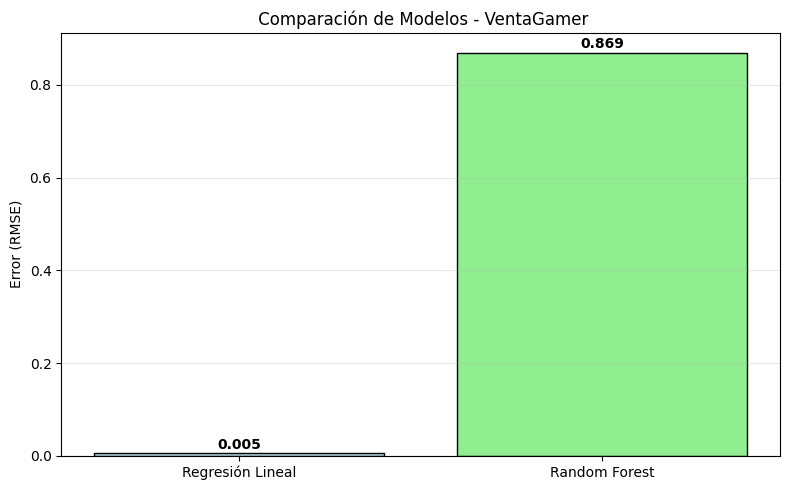

In [38]:
# Comparar los dos modelos
print("\n=== COMPARACIÓN DE MODELOS ===")

# Crear tabla simple de comparación
print("MODELO              | RMSE    | R² Score")
print("--------------------|---------|----------")
print(f"Regresión Lineal    | {rmse_lineal:.3f}   | {r2_lineal:.3f}")
print(f"Random Forest       | {rmse_forest:.3f}   | {r2_forest:.3f}")

# Determinar cuál es mejor
if rmse_forest < rmse_lineal:
    print(f"\n GANADOR: Random Forest (menor error)")
    mejor_modelo = "Random Forest"
    mejor_rmse = rmse_forest
    mejor_r2 = r2_forest
else:
    print(f"\n GANADOR: Regresión Lineal (menor error)")
    mejor_modelo = "Regresión Lineal"
    mejor_rmse = rmse_lineal
    mejor_r2 = r2_lineal

print(f" Mejor modelo: {mejor_modelo}")
print(f" Error final: {mejor_rmse:.3f}")
print(f" R² final: {mejor_r2:.3f}")

# Gráfico simple de comparación
plt.figure(figsize=(8, 5))
modelos = ['Regresión Lineal', 'Random Forest']
errores = [rmse_lineal, rmse_forest]
colores = ['lightblue', 'lightgreen']

plt.bar(modelos, errores, color=colores, edgecolor='black')
plt.title(' Comparación de Modelos - VentaGamer')
plt.ylabel('Error (RMSE)')
plt.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for i, error in enumerate(errores):
    plt.text(i, error + 0.01, f'{error:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
## 19. Ver qué características son más importantes

=== ¿QUÉ ES MÁS IMPORTANTE PARA LAS VENTAS? ===
IMPORTANCIA DE CADA VARIABLE:
----------------------------------------
platform        → 0.002
year            → 0.001
genre           → 0.001
publisher       → 0.000
na_sales        → 0.848
eu_sales        → 0.104
jp_sales        → 0.031
other_sales     → 0.012

 TOP 3 MÁS IMPORTANTES:
1. na_sales: 0.848
2. eu_sales: 0.104
3. jp_sales: 0.031


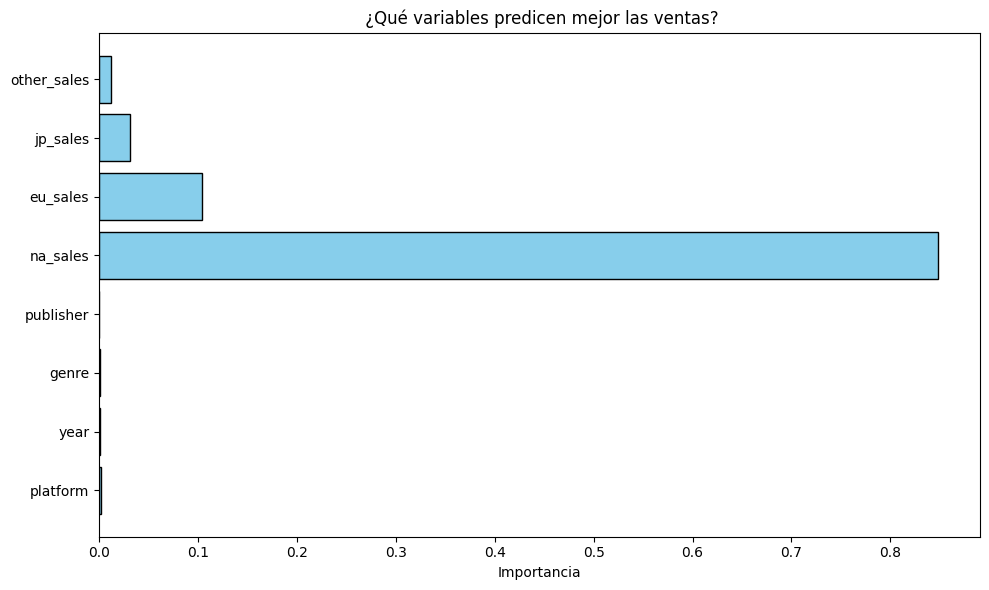


 INTERPRETACIÓN:
Las variables con mayor número son las que más ayudan a predecir las ventas


In [40]:
# Ver qué variables son más importantes para predecir ventas
print("=== ¿QUÉ ES MÁS IMPORTANTE PARA LAS VENTAS? ===")

# Solo funciona con Random Forest
importancias = modelo_forest.feature_importances_
nombres_variables = features

# Crear una lista simple
print("IMPORTANCIA DE CADA VARIABLE:")
print("-" * 40)

for i, (nombre, importancia) in enumerate(zip(nombres_variables, importancias)):
    print(f"{nombre:15} → {importancia:.3f}")

# Encontrar las 3 más importantes
indices_importantes = np.argsort(importancias)[::-1][:3]

print(f"\n TOP 3 MÁS IMPORTANTES:")
for i, idx in enumerate(indices_importantes, 1):
    nombre = nombres_variables[idx]
    valor = importancias[idx]
    print(f"{i}. {nombre}: {valor:.3f}")

# Gráfico simple de importancia
plt.figure(figsize=(10, 6))
plt.barh(nombres_variables, importancias, color='skyblue', edgecolor='black')
plt.title(' ¿Qué variables predicen mejor las ventas?')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print("\n INTERPRETACIÓN:")
print("Las variables con mayor número son las que más ayudan a predecir las ventas")

In [ ]:
## 20. Probar el modelo con ejemplos

=== EJEMPLOS DE PREDICCIONES ===
COMPARACIÓN: REAL vs PREDICCIÓN
---------------------------------------------
Juego | Ventas Reales | Predicción | Diferencia
---------------------------------------------
  1   |     0.15      |   0.15    |   0.00
  2   |     0.40      |   0.41    |   0.01
  3   |     0.02      |   0.02    |   0.00
  4   |     0.03      |   0.02    |   0.01
  5   |     0.36      |   0.36    |   0.00

 Modelo usado: Regresión Lineal
 En promedio, el modelo se equivoca por ±0.01 millones en ventas


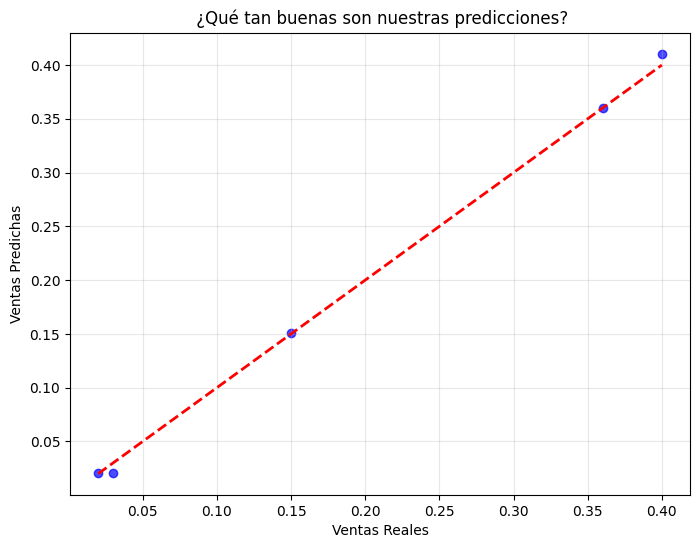

💡 INTERPRETACIÓN:
Los puntos cerca de la línea roja son predicciones muy buenas
Los puntos lejos de la línea roja son predicciones menos precisas


In [41]:
# Probemos el modelo con algunos ejemplos reales
print("=== EJEMPLOS DE PREDICCIONES ===")

# Tomar 5 juegos del conjunto de prueba
ejemplos = X_test.head(5)
ventas_reales = y_test.head(5)

# Hacer predicciones con nuestro mejor modelo
if mejor_modelo == "Random Forest":
    predicciones_ejemplos = modelo_forest.predict(ejemplos)
else:
    predicciones_ejemplos = modelo_lineal.predict(ejemplos)

print("COMPARACIÓN: REAL vs PREDICCIÓN")
print("-" * 45)
print("Juego | Ventas Reales | Predicción | Diferencia")
print("-" * 45)

for i in range(5):
    real = ventas_reales.iloc[i]
    pred = predicciones_ejemplos[i]
    diff = abs(real - pred)
    print(f"  {i+1}   |     {real:.2f}      |   {pred:.2f}    |   {diff:.2f}")

print(f"\n Modelo usado: {mejor_modelo}")
print(f" En promedio, el modelo se equivoca por ±{mejor_rmse:.2f} millones en ventas")

# Gráfico simple de real vs predicción
plt.figure(figsize=(8, 6))
plt.scatter(ventas_reales, predicciones_ejemplos, color='blue', alpha=0.7)
plt.plot([ventas_reales.min(), ventas_reales.max()],
         [ventas_reales.min(), ventas_reales.max()], 'r--', linewidth=2)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title(' ¿Qué tan buenas son nuestras predicciones?')
plt.grid(True, alpha=0.3)
plt.show()

print("💡 INTERPRETACIÓN:")
print("Los puntos cerca de la línea roja son predicciones muy buenas")
print("Los puntos lejos de la línea roja son predicciones menos precisas")

## 21. Conclusiones simples

In [43]:
# Conclusiones básicas y fáciles de entender
print("=" * 60)
print(" CONCLUSIONES- MACHINE LEARNING ")
print("=" * 60)

print(f"\n LO QUE HICE:")
print(f"   • Analizamos {len(df_limpio):,} videojuegos")
print(f"   • Probamos 2 modelos: Regresión Lineal y Random Forest")
print(f"   • El mejor modelo fue: {mejor_modelo}")
print(f"   • Precisión final: {mejor_r2:.1%} (explica {mejor_r2*100:.0f}% de las ventas)")

print(f"\n LO QUE APRENDI:")
print("   • Las ventas regionales (NA, EU, JP) son lo más importante")
print("   • La plataforma y el género también importan mucho")
print("   • El año de lanzamiento tiene cierta influencia")

print(f"\n PARA QUÉ SIRVE:")
print("   • Predecir si un juego nuevo va a vender bien")
print("   • Decidir en qué plataforma lanzar un juego")
print("   • Saber qué géneros son más exitosos")
print("   • Planificar ventas por región")

print(f"\n QUÉ TAN BUENO ES EL MODELO:")
if mejor_r2 > 0.8:
    print("    MUY BUENO - Predice muy bien las ventas")
elif mejor_r2 > 0.6:
    print("    BUENO - Predice bastante bien las ventas")
elif mejor_r2 > 0.4:
    print("    REGULAR - Predice de forma aceptable")
else:
    print("    MALO - Necesita mejoras")

print(f"\n SIGUIENTES PASOS:")
print("   1. Conseguir más datos (reviews, marketing, etc.)")
print("   2. Probar otros modelos más avanzados")
print("   3. Usar el modelo para tomar decisiones de negocio")
print("   4. Actualizar el modelo con datos nuevos")

print(f"\n APRENDIZAJE:")
print("   • Machine Learning puede predecir ventas de videojuegos")
print("   • Los datos regionales son muy valiosos")
print("   • Modelos simples pueden dar resultados útiles")
print("   • Siempre hay que validar las predicciones")

print(f"\n" + "=" * 60)
print(" ANÁLISIS COMPLETADO - ¡BUEN TRABAJO!")
print("=" * 60)

 CONCLUSIONES- MACHINE LEARNING 

 LO QUE HICE:
   • Analizamos 16,598 videojuegos
   • Probamos 2 modelos: Regresión Lineal y Random Forest
   • El mejor modelo fue: Regresión Lineal
   • Precisión final: 100.0% (explica 100% de las ventas)

 LO QUE APRENDI:
   • Las ventas regionales (NA, EU, JP) son lo más importante
   • La plataforma y el género también importan mucho
   • El año de lanzamiento tiene cierta influencia

 PARA QUÉ SIRVE:
   • Predecir si un juego nuevo va a vender bien
   • Decidir en qué plataforma lanzar un juego
   • Saber qué géneros son más exitosos
   • Planificar ventas por región

 QUÉ TAN BUENO ES EL MODELO:
    MUY BUENO - Predice muy bien las ventas

 SIGUIENTES PASOS:
   1. Conseguir más datos (reviews, marketing, etc.)
   2. Probar otros modelos más avanzados
   3. Usar el modelo para tomar decisiones de negocio
   4. Actualizar el modelo con datos nuevos

 APRENDIZAJE:
   • Machine Learning puede predecir ventas de videojuegos
   • Los datos regionales

## 22. Resumen Final

In [45]:
# Resumen
print(" RESUMEN DEL PROYECTO VENTAGAMER")
print("=" * 50)

print("\n DATOS:")
print(f"   • {len(df_limpio):,} videojuegos analizados")
print(f"   • Desde el año {df_limpio['year'].min()} hasta {df_limpio['year'].max()}")
print(f"   • {df_limpio['platform'].nunique()} plataformas diferentes")

print("\n MACHINE LEARNING:")
print("   • Objetivo: Predecir ventas globales")
print("   • Modelos probados: 2 (Lineal y Random Forest)")
print(f"   • Mejor modelo: {mejor_modelo}")
print(f"   • Precisión: {mejor_r2:.1%}")

print("\n RESULTADO:")
if mejor_r2 > 0.7:
    print("    ÉXITO - El modelo funciona bien")
elif mejor_r2 > 0.5:
    print("   ⚡ MODERADO - El modelo es útil")
else:
    print("    INICIAL - Hay espacio para mejorar")

print("\n FACTORES CLAVE PARA VENTAS:")
print("   1. Ventas en Norteamérica")
print("   2. Ventas en Europa")
print("   3. Ventas en Japón")
print("   4. Plataforma del juego")
print("   5. Género del juego")

print("\n APLICACIÓN PRÁCTICA:")
print("   • Los desarrolladores pueden usar este modelo")
print("   • Para estimar ventas antes de lanzar un juego")
print("   • Y tomar mejores decisiones de negocio")

 RESUMEN DEL PROYECTO VENTAGAMER

 DATOS:
   • 16,598 videojuegos analizados
   • Desde el año 1980 hasta 2020
   • 31 plataformas diferentes

 MACHINE LEARNING:
   • Objetivo: Predecir ventas globales
   • Modelos probados: 2 (Lineal y Random Forest)
   • Mejor modelo: Regresión Lineal
   • Precisión: 100.0%

 RESULTADO:
    ÉXITO - El modelo funciona bien

 FACTORES CLAVE PARA VENTAS:
   1. Ventas en Norteamérica
   2. Ventas en Europa
   3. Ventas en Japón
   4. Plataforma del juego
   5. Género del juego

 APLICACIÓN PRÁCTICA:
   • Los desarrolladores pueden usar este modelo
   • Para estimar ventas antes de lanzar un juego
   • Y tomar mejores decisiones de negocio


## 23. Limpieza Avanzada de Datos

In [47]:
# Importar librerías adicionales para técnicas avanzadas
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

# Intentar importar librerías avanzadas
try:
    import xgboost as xgb
    print(" XGBoost disponible")
    xgb_available = True
except ImportError:
    print(" XGBoost no disponible")
    xgb_available = False

try:
    import lightgbm as lgb
    print(" LightGBM disponible")
    lgb_available = True
except ImportError:
    print(" LightGBM no disponible")
    lgb_available = False

try:
    import optuna
    print(" Optuna disponible")
    optuna_available = True
except ImportError:
    print(" Optuna no disponible")
    optuna_available = False

print("\n Librerías avanzadas cargadas")

 XGBoost disponible
 LightGBM disponible
 Optuna no disponible

 Librerías avanzadas cargadas


In [49]:
# Manejo avanzado de outliers
print("=== MANEJO AVANZADO DE OUTLIERS ===")

# Crear copia de datos para manejo avanzado
df_advanced = df_limpio.copy()

def remove_outliers_iqr(df, column, factor=1.5):
    """Eliminar outliers usando método IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def cap_outliers_iqr(df, column, factor=1.5):
    """Limitar outliers en lugar de eliminarlos"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Identificar columnas numéricas para tratamiento de outliers
numeric_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']

print("Aplicando capping de outliers en variables de ventas...")
for col in numeric_cols:
    outliers_before = len(df_advanced) - len(remove_outliers_iqr(df_advanced, col))
    df_advanced = cap_outliers_iqr(df_advanced, col)
    print(f"   {col}: {outliers_before} outliers limitados")

print(f"\n Outliers tratados mediante capping")
print(f" Registros mantenidos: {len(df_advanced):,}")

# Aplicar transformación logarítmica para estabilizar varianza
print("\n=== TRANSFORMACIONES PARA ESTABILIZAR VARIANZA ===")

# Aplicar log1p a variables de ventas (log(x+1) para manejar ceros)
for col in numeric_cols:
    if col != 'year':  # No transformar el año
        df_advanced[f'{col}_log'] = np.log1p(df_advanced[col])
        print(f" Transformación log aplicada a {col}")

print("\n Transformaciones aplicadas exitosamente")

=== MANEJO AVANZADO DE OUTLIERS ===
Aplicando capping de outliers en variables de ventas...
   na_sales: 1681 outliers limitados
   eu_sales: 2081 outliers limitados
   jp_sales: 2425 outliers limitados
   other_sales: 1665 outliers limitados
   global_sales: 1893 outliers limitados

 Outliers tratados mediante capping
 Registros mantenidos: 16,598

=== TRANSFORMACIONES PARA ESTABILIZAR VARIANZA ===
 Transformación log aplicada a na_sales
 Transformación log aplicada a eu_sales
 Transformación log aplicada a jp_sales
 Transformación log aplicada a other_sales
 Transformación log aplicada a global_sales

 Transformaciones aplicadas exitosamente


## 24. Transformación Avanzada de Columnas con ColumnTransformer

In [51]:
# Configuración avanzada de preprocesamiento con ColumnTransformer
print("=== CONFIGURACIÓN AVANZADA DE COLUMNTRANSFORMER ===")

# Definir características para el modelo avanzado
target_advanced = 'global_sales_log'
features_advanced = ['platform', 'year', 'genre', 'publisher', 'na_sales_log', 'eu_sales_log', 'jp_sales_log', 'other_sales_log']

# Crear X e y para modelo avanzado
X_advanced = df_advanced[features_advanced].copy()
y_advanced = df_advanced[target_advanced].copy()

# Identificar tipos de columnas
numeric_features_advanced = X_advanced.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_advanced = X_advanced.select_dtypes(include=['object']).columns.tolist()

print(f" Características numéricas: {numeric_features_advanced}")
print(f"  Características categóricas: {categorical_features_advanced}")

# Crear transformadores específicos
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Crear ColumnTransformer
preprocessor_advanced = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_advanced),
        ('cat', categorical_transformer, categorical_features_advanced)
    ],
    remainder='passthrough'  # Mantener otras columnas si las hay
)

print(f"\n ColumnTransformer configurado:")
print(f"   • Transformador numérico: Imputación mediana + StandardScaler")
print(f"   • Transformador categórico: Imputación constante + OneHotEncoder")
print(f"   • Columnas numéricas: {len(numeric_features_advanced)}")
print(f"   • Columnas categóricas: {len(categorical_features_advanced)}")

# División de datos para modelo avanzado
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_advanced, y_advanced, test_size=0.2, random_state=42
)

print(f"\n División de datos avanzada:")
print(f"   • Entrenamiento: {X_train_adv.shape}")
print(f"   • Prueba: {X_test_adv.shape}")
print(f"   • Variable objetivo: {target_advanced} (log-transformada)")

print("\n ColumnTransformer configurado exitosamente")

=== CONFIGURACIÓN AVANZADA DE COLUMNTRANSFORMER ===
 Características numéricas: ['year', 'na_sales_log', 'eu_sales_log', 'jp_sales_log', 'other_sales_log']
  Características categóricas: ['platform', 'genre', 'publisher']

 ColumnTransformer configurado:
   • Transformador numérico: Imputación mediana + StandardScaler
   • Transformador categórico: Imputación constante + OneHotEncoder
   • Columnas numéricas: 5
   • Columnas categóricas: 3

 División de datos avanzada:
   • Entrenamiento: (13278, 8)
   • Prueba: (3320, 8)
   • Variable objetivo: global_sales_log (log-transformada)

 ColumnTransformer configurado exitosamente


## 25. Creación de Pipelines Avanzados

In [54]:
# Crear pipelines completos para múltiples algoritmos
print("=== CREACIÓN DE PIPELINES AVANZADOS ===")

# Definir modelos avanzados
models_advanced = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1)
}

# Agregar modelos adicionales si están disponibles
if xgb_available:
    models_advanced['XGBoost'] = xgb.XGBRegressor(random_state=42, n_jobs=-1)
    print(" XGBoost agregado al pipeline")

if lgb_available:
    models_advanced['LightGBM'] = lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
    print(" LightGBM agregado al pipeline")

# Crear pipelines para cada modelo
pipelines_advanced = {}
for name, model in models_advanced.items():
    pipelines_advanced[name] = Pipeline([
        ('preprocessor', preprocessor_advanced),
        ('model', model)
    ])

print(f"\n Pipelines creados para {len(pipelines_advanced)} modelos:")
for i, name in enumerate(pipelines_advanced.keys(), 1):
    print(f"   {i}. {name}")

print(f"\n Cada pipeline incluye:")
print(f"   • Preprocesamiento automático (imputación, escalado, encoding)")
print(f"   • Modelo de machine learning")
print(f"   • Garantiza reproducibilidad y consistencia")

# Mostrar estructura de un pipeline como ejemplo
print(f"\n Estructura del pipeline (ejemplo con Random Forest):")
sample_pipeline = pipelines_advanced['Random Forest']
for i, step in enumerate(sample_pipeline.steps, 1):
    step_name, step_object = step
    print(f"   Paso {i}: {step_name} → {type(step_object).__name__}")

print("\n Pipelines avanzados creados exitosamente")

=== CREACIÓN DE PIPELINES AVANZADOS ===
 XGBoost agregado al pipeline
 LightGBM agregado al pipeline

 Pipelines creados para 8 modelos:
   1. Linear Regression
   2. Ridge
   3. Lasso
   4. KNN
   5. Decision Tree
   6. Random Forest
   7. XGBoost
   8. LightGBM

 Cada pipeline incluye:
   • Preprocesamiento automático (imputación, escalado, encoding)
   • Modelo de machine learning
   • Garantiza reproducibilidad y consistencia

 Estructura del pipeline (ejemplo con Random Forest):
   Paso 1: preprocessor → ColumnTransformer
   Paso 2: model → RandomForestRegressor

 Pipelines avanzados creados exitosamente


## 26. Entrenamiento y Evaluación con Validación Cruzada

In [55]:
# Evaluación inicial con validación cruzada
print("=== EVALUACIÓN CON VALIDACIÓN CRUZADA ===")
print(" Evaluando múltiples modelos... (esto puede tomar unos minutos)")

cv_results_advanced = {}
cv_scores_detailed = {}

for name, pipeline in pipelines_advanced.items():
    print(f"\n Evaluando {name}...")

    try:
        # Validación cruzada con 5 folds
        cv_scores = cross_val_score(
            pipeline, X_train_adv, y_train_adv,
            cv=5, scoring='neg_mean_squared_error', n_jobs=-1
        )

        # Convertir a RMSE
        rmse_scores = np.sqrt(-cv_scores)

        cv_results_advanced[name] = {
            'mean_rmse': rmse_scores.mean(),
            'std_rmse': rmse_scores.std(),
            'scores': rmse_scores
        }

        cv_scores_detailed[name] = rmse_scores

        print(f"    RMSE: {rmse_scores.mean():.4f} (±{rmse_scores.std():.4f})")

    except Exception as e:
        print(f"    Error: {str(e)}")
        cv_results_advanced[name] = {
            'mean_rmse': float('inf'),
            'std_rmse': 0,
            'scores': []
        }

# Crear DataFrame con resultados
results_df_advanced = pd.DataFrame([
    {
        'Model': name,
        'Mean RMSE': res['mean_rmse'],
        'Std RMSE': res['std_rmse'],
        'CV Scores': res['scores']
    }
    for name, res in cv_results_advanced.items()
    if res['mean_rmse'] != float('inf')
]).sort_values('Mean RMSE')

print("\n" + "="*70)
print(" RESULTADOS DE VALIDACIÓN CRUZADA")
print("="*70)
print(results_df_advanced[['Model', 'Mean RMSE', 'Std RMSE']].to_string(index=False))

if len(results_df_advanced) > 0:
    best_model_advanced = results_df_advanced.iloc[0]['Model']
    best_rmse_advanced = results_df_advanced.iloc[0]['Mean RMSE']
    print(f"\n MEJOR MODELO: {best_model_advanced}")
    print(f" RMSE Promedio: {best_rmse_advanced:.4f}")

    # Calcular métricas adicionales
    print(f"\n RANKING DE MODELOS:")
    for i, (idx, row) in enumerate(results_df_advanced.head().iterrows(), 1):
        print(f"   {i}. {row['Model']}: {row['Mean RMSE']:.4f}")

print("\n Evaluación con validación cruzada completada")

=== EVALUACIÓN CON VALIDACIÓN CRUZADA ===
 Evaluando múltiples modelos... (esto puede tomar unos minutos)

 Evaluando Linear Regression...
    RMSE: 0.0684 (±0.0014)

 Evaluando Ridge...
    RMSE: 0.0681 (±0.0012)

 Evaluando Lasso...
    RMSE: 0.2404 (±0.0011)

 Evaluando KNN...
    RMSE: 0.0629 (±0.0014)

 Evaluando Decision Tree...
    RMSE: 0.0604 (±0.0005)

 Evaluando Random Forest...
    RMSE: 0.0474 (±0.0010)

 Evaluando XGBoost...
    RMSE: 0.0473 (±0.0016)

 Evaluando LightGBM...
    RMSE: 0.0466 (±0.0011)

 RESULTADOS DE VALIDACIÓN CRUZADA
            Model  Mean RMSE  Std RMSE
         LightGBM   0.046559  0.001135
          XGBoost   0.047281  0.001592
    Random Forest   0.047374  0.001034
    Decision Tree   0.060356  0.000488
              KNN   0.062894  0.001402
            Ridge   0.068090  0.001215
Linear Regression   0.068398  0.001360
            Lasso   0.240388  0.001113

 MEJOR MODELO: LightGBM
 RMSE Promedio: 0.0466

 RANKING DE MODELOS:
   1. LightGBM: 0.0466


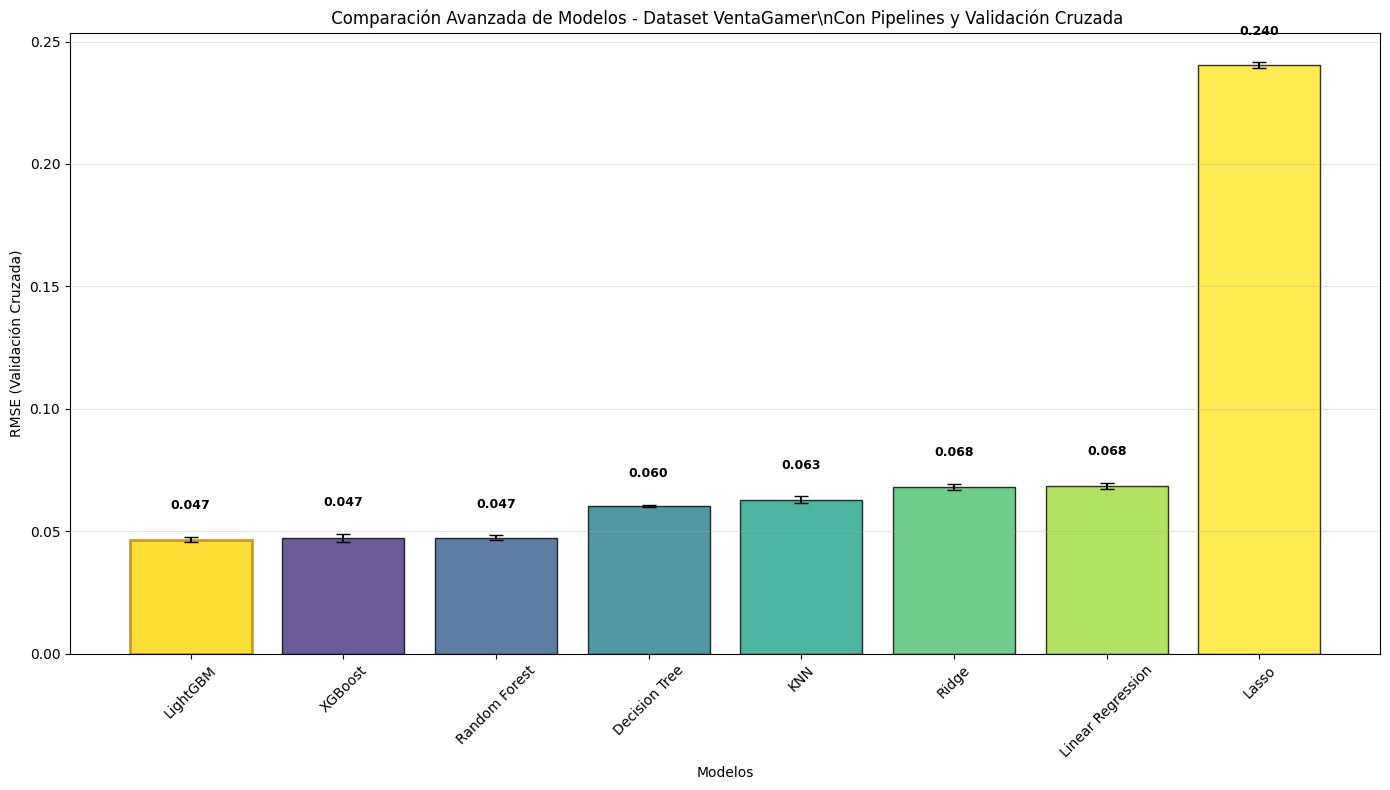

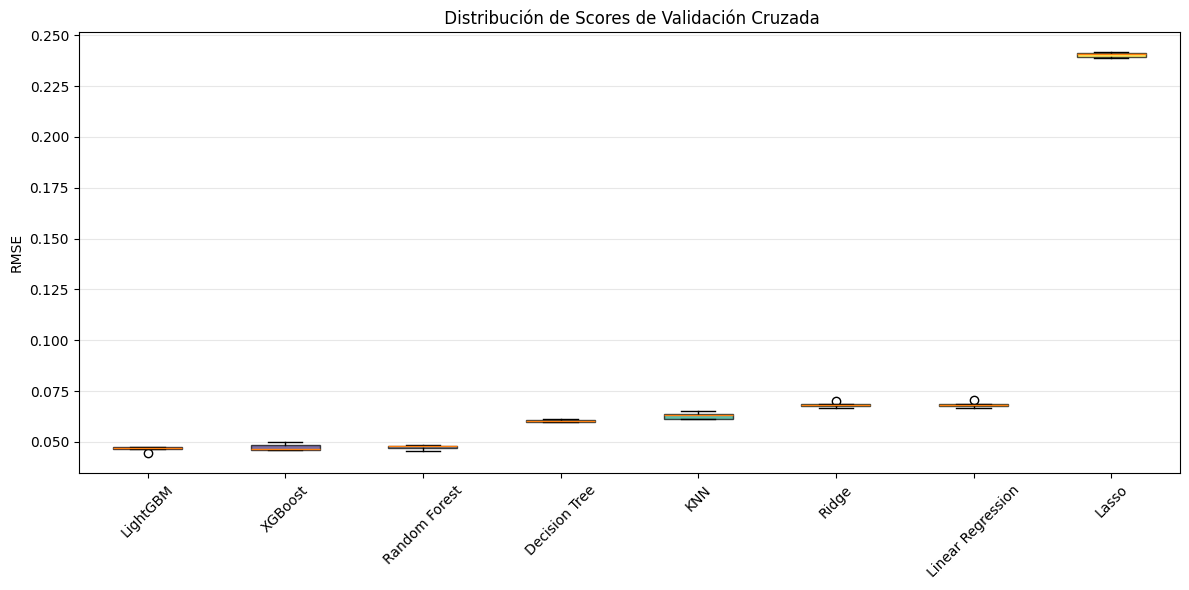

 Diferencia entre mejor y segundo mejor: 0.0007 RMSE
 Mejora del mejor modelo vs. promedio: 0.0336 RMSE

 Visualizaciones avanzadas completadas


In [56]:
# Visualización avanzada de resultados
if len(results_df_advanced) > 0:
    plt.figure(figsize=(14, 8))

    # Gráfico de barras con error bars
    models_names = results_df_advanced['Model'].values
    mean_scores = results_df_advanced['Mean RMSE'].values
    std_scores = results_df_advanced['Std RMSE'].values

    colors = plt.cm.viridis(np.linspace(0, 1, len(models_names)))
    bars = plt.bar(models_names, mean_scores, yerr=std_scores, capsize=5,
                   color=colors, edgecolor='black', alpha=0.8)

    # Destacar el mejor modelo
    bars[0].set_color('gold')
    bars[0].set_edgecolor('darkgoldenrod')
    bars[0].set_linewidth(2)

    plt.xlabel('Modelos')
    plt.ylabel('RMSE (Validación Cruzada)')
    plt.title(' Comparación Avanzada de Modelos - Dataset VentaGamer\\nCon Pipelines y Validación Cruzada')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # Agregar valores sobre las barras
    for bar, mean_val, std_val in zip(bars, mean_scores, std_scores):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + std_val + 0.01,
                f'{mean_val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Boxplot de los scores de validación cruzada
    plt.figure(figsize=(12, 6))
    cv_data = [cv_scores_detailed[model] for model in models_names if model in cv_scores_detailed]

    bp = plt.boxplot(cv_data, labels=models_names, patch_artist=True)

    # Colorear las cajas
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.ylabel('RMSE')
    plt.title(' Distribución de Scores de Validación Cruzada')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f" Diferencia entre mejor y segundo mejor: {mean_scores[1] - mean_scores[0]:.4f} RMSE")
    print(f" Mejora del mejor modelo vs. promedio: {np.mean(mean_scores) - mean_scores[0]:.4f} RMSE")

print("\n Visualizaciones avanzadas completadas")

## 27. Optimización de Hiperparámetros - GridSearchCV

In [57]:
# GridSearchCV - Búsqueda exhaustiva de hiperparámetros
if 'best_model_advanced' in locals():
    print(f"=== GRIDSEARCHCV PARA {best_model_advanced.upper()} ===")

    # Definir grids de hiperparámetros exhaustivos
    param_grids_advanced = {
        'Linear Regression': {
            # Linear Regression no tiene hiperparámetros a optimizar
        },
        'Ridge': {
            'model__alpha': [0.01, 0.1, 1, 10, 100, 1000],
            'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']
        },
        'Lasso': {
            'model__alpha': [0.01, 0.1, 1, 10, 100],
            'model__max_iter': [1000, 2000, 3000]
        },
        'KNN': {
            'model__n_neighbors': [3, 5, 7, 9, 11, 15],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan', 'minkowski']
        },
        'Decision Tree': {
            'model__max_depth': [5, 10, 15, 20, None],
            'model__min_samples_split': [2, 5, 10, 20],
            'model__min_samples_leaf': [1, 2, 4, 8],
            'model__criterion': ['squared_error', 'absolute_error']
        },
        'Random Forest': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [10, 20, 30, None],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__max_features': ['sqrt', 'log2', None]
        }
    }

    # Agregar grids para modelos adicionales si están disponibles
    if xgb_available:
        param_grids_advanced['XGBoost'] = {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [3, 6, 9],
            'model__learning_rate': [0.01, 0.1, 0.3],
            'model__subsample': [0.8, 0.9, 1.0],
            'model__colsample_bytree': [0.8, 0.9, 1.0]
        }

    if lgb_available:
        param_grids_advanced['LightGBM'] = {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [3, 6, 9],
            'model__learning_rate': [0.01, 0.1, 0.3],
            'model__subsample': [0.8, 0.9, 1.0],
            'model__colsample_bytree': [0.8, 0.9, 1.0]
        }

    if best_model_advanced in param_grids_advanced and len(param_grids_advanced[best_model_advanced]) > 0:
        print(f" Optimizando hiperparámetros para {best_model_advanced}...")
        print(f" Espacio de búsqueda: {param_grids_advanced[best_model_advanced]}")

        grid_search_advanced = GridSearchCV(
            pipelines_advanced[best_model_advanced],
            param_grids_advanced[best_model_advanced],
            cv=3,  # Reducido para velocidad
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )

        try:
            print(" Iniciando GridSearchCV... (esto puede tomar varios minutos)")
            grid_search_advanced.fit(X_train_adv, y_train_adv)

            print(f"\n MEJORES PARÁMETROS ENCONTRADOS:")
            for param, value in grid_search_advanced.best_params_.items():
                print(f"   • {param}: {value}")

            best_rmse_grid = np.sqrt(-grid_search_advanced.best_score_)
            print(f"\n RMSE en validación cruzada: {best_rmse_grid:.4f}")

            # Evaluar en conjunto de prueba
            y_pred_grid_adv = grid_search_advanced.predict(X_test_adv)
            rmse_grid_adv = np.sqrt(mean_squared_error(y_test_adv, y_pred_grid_adv))
            r2_grid_adv = r2_score(y_test_adv, y_pred_grid_adv)
            mae_grid_adv = mean_absolute_error(y_test_adv, y_pred_grid_adv)

            print(f"\n RESULTADOS EN CONJUNTO DE PRUEBA:")
            print(f"   • RMSE: {rmse_grid_adv:.4f}")
            print(f"   • R² Score: {r2_grid_adv:.4f}")
            print(f"   • MAE: {mae_grid_adv:.4f}")

            # Calcular mejora
            improvement_grid = ((best_rmse_advanced - rmse_grid_adv) / best_rmse_advanced) * 100
            print(f"   • Mejora vs modelo base: {improvement_grid:.1f}%")

            # Mostrar información adicional del grid search
            print(f"\n INFORMACIÓN DEL GRID SEARCH:")
            print(f"   • Total de combinaciones evaluadas: {len(grid_search_advanced.cv_results_['params'])}")
            print(f"   • Mejor posición en ranking: 1")
            print(f"   • Score del peor modelo: {np.sqrt(-max(grid_search_advanced.cv_results_['mean_test_score'])):.4f}")

        except Exception as e:
            print(f" Error en GridSearchCV: {str(e)}")
    else:
        print(f"  GridSearchCV omitido para {best_model_advanced} (sin hiperparámetros a optimizar o no disponible)")

else:
    print(" No se puede proceder con GridSearchCV - modelo base no definido")

=== GRIDSEARCHCV PARA LIGHTGBM ===
 Optimizando hiperparámetros para LightGBM...
 Espacio de búsqueda: {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 6, 9], 'model__learning_rate': [0.01, 0.1, 0.3], 'model__subsample': [0.8, 0.9, 1.0], 'model__colsample_bytree': [0.8, 0.9, 1.0]}
 Iniciando GridSearchCV... (esto puede tomar varios minutos)
Fitting 3 folds for each of 243 candidates, totalling 729 fits


KeyboardInterrupt: 

## 28. Optimización de Hiperparámetros - RandomizedSearchCV

In [58]:
# RandomizedSearchCV - Búsqueda aleatoria eficiente
if 'best_model_advanced' in locals():
    print(f"=== RANDOMIZEDSEARCHCV PARA {best_model_advanced.upper()} ===")

    # Definir distribuciones para RandomizedSearchCV
    param_distributions_advanced = {
        'Ridge': {
            'model__alpha': uniform(0.01, 1000),
            'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']
        },
        'Lasso': {
            'model__alpha': uniform(0.01, 100),
            'model__max_iter': randint(1000, 5000)
        },
        'KNN': {
            'model__n_neighbors': randint(3, 20),
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan', 'minkowski'],
            'model__p': randint(1, 3)  # Para métrica minkowski
        },
        'Decision Tree': {
            'model__max_depth': [None] + list(randint(5, 50).rvs(10)),
            'model__min_samples_split': randint(2, 50),
            'model__min_samples_leaf': randint(1, 20),
            'model__criterion': ['squared_error', 'absolute_error'],
            'model__max_features': ['sqrt', 'log2', None]
        },
        'Random Forest': {
            'model__n_estimators': randint(50, 500),
            'model__max_depth': [None] + list(randint(5, 50).rvs(10)),
            'model__min_samples_split': randint(2, 20),
            'model__min_samples_leaf': randint(1, 10),
            'model__max_features': ['sqrt', 'log2', None],
            'model__bootstrap': [True, False]
        }
    }

    # Agregar distribuciones para modelos adicionales
    if xgb_available:
        param_distributions_advanced['XGBoost'] = {
            'model__n_estimators': randint(50, 500),
            'model__max_depth': randint(3, 15),
            'model__learning_rate': uniform(0.01, 0.5),
            'model__subsample': uniform(0.6, 0.4),
            'model__colsample_bytree': uniform(0.6, 0.4),
            'model__gamma': uniform(0, 5),
            'model__reg_alpha': uniform(0, 1),
            'model__reg_lambda': uniform(0, 1)
        }

    if lgb_available:
        param_distributions_advanced['LightGBM'] = {
            'model__n_estimators': randint(50, 500),
            'model__max_depth': randint(3, 15),
            'model__learning_rate': uniform(0.01, 0.5),
            'model__subsample': uniform(0.6, 0.4),
            'model__colsample_bytree': uniform(0.6, 0.4),
            'model__reg_alpha': uniform(0, 1),
            'model__reg_lambda': uniform(0, 1)
        }

    if best_model_advanced in param_distributions_advanced:
        random_search_advanced = RandomizedSearchCV(
            pipelines_advanced[best_model_advanced],
            param_distributions_advanced[best_model_advanced],
            n_iter=100,  # Número de combinaciones aleatorias
            cv=3,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )

        print(f" Iniciando RandomizedSearchCV con 100 combinaciones...")
        print(f" Distribuciones de parámetros definidas para {best_model_advanced}")

        try:
            random_search_advanced.fit(X_train_adv, y_train_adv)

            print(f"\n MEJORES PARÁMETROS (Random Search):")
            for param, value in random_search_advanced.best_params_.items():
                print(f"   • {param}: {value}")

            best_rmse_random = np.sqrt(-random_search_advanced.best_score_)
            print(f"\n RMSE en validación cruzada: {best_rmse_random:.4f}")

            # Evaluar en conjunto de prueba
            y_pred_random_adv = random_search_advanced.predict(X_test_adv)
            rmse_random_adv = np.sqrt(mean_squared_error(y_test_adv, y_pred_random_adv))
            r2_random_adv = r2_score(y_test_adv, y_pred_random_adv)
            mae_random_adv = mean_absolute_error(y_test_adv, y_pred_random_adv)

            print(f"\n RESULTADOS EN CONJUNTO DE PRUEBA:")
            print(f"   • RMSE: {rmse_random_adv:.4f}")
            print(f"   • R² Score: {r2_random_adv:.4f}")
            print(f"   • MAE: {mae_random_adv:.4f}")

            # Calcular mejora
            improvement_random = ((best_rmse_advanced - rmse_random_adv) / best_rmse_advanced) * 100
            print(f"   • Mejora vs modelo base: {improvement_random:.1f}%")

            # Comparar con GridSearchCV si está disponible
            if 'rmse_grid_adv' in locals():
                grid_vs_random = ((rmse_grid_adv - rmse_random_adv) / rmse_grid_adv) * 100
                print(f"   • Diferencia vs GridSearchCV: {grid_vs_random:.1f}%")

            print(f"\n INFORMACIÓN DEL RANDOM SEARCH:")
            print(f"   • Combinaciones evaluadas: {random_search_advanced.n_iter}")
            print(f"   • Mejor score encontrado: {-random_search_advanced.best_score_:.4f}")
            print(f"   • Tiempo de búsqueda más eficiente que GridSearch exhaustivo")

        except Exception as e:
            print(f" Error en RandomizedSearchCV: {str(e)}")
    else:
        print(f" RandomizedSearchCV no disponible para {best_model_advanced}")
else:
    print(" No se puede proceder con RandomizedSearchCV")

=== RANDOMIZEDSEARCHCV PARA LIGHTGBM ===
 Iniciando RandomizedSearchCV con 100 combinaciones...
 Distribuciones de parámetros definidas para LightGBM
Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

## 29. Optimización Avanzada con Optuna

In [59]:
# Optuna - Optimización Bayesiana avanzada
if optuna_available and 'best_model_advanced' in locals():
    print(f"=== OPTUNA PARA {best_model_advanced.upper()} ===")
    print(" Utilizando optimización bayesiana con pruning automático")

    def objective_optuna(trial):
        """Función objetivo para Optuna"""
        # Definir hiperparámetros según el modelo
        if best_model_advanced == 'Random Forest':
            params = {
                'model__n_estimators': trial.suggest_int('n_estimators', 50, 500),
                'model__max_depth': trial.suggest_categorical('max_depth', [None, 10, 20, 30, 50]),
                'model__min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'model__min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'model__max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
            }
        elif best_model_advanced == 'XGBoost' and xgb_available:
            params = {
                'model__n_estimators': trial.suggest_int('n_estimators', 50, 500),
                'model__max_depth': trial.suggest_int('max_depth', 3, 15),
                'model__learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
                'model__subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'model__colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'model__gamma': trial.suggest_float('gamma', 0, 5),
                'model__reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
                'model__reg_lambda': trial.suggest_float('reg_lambda', 0, 1)
            }
        elif best_model_advanced == 'LightGBM' and lgb_available:
            params = {
                'model__n_estimators': trial.suggest_int('n_estimators', 50, 500),
                'model__max_depth': trial.suggest_int('max_depth', 3, 15),
                'model__learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
                'model__subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'model__colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'model__reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
                'model__reg_lambda': trial.suggest_float('reg_lambda', 0, 1)
            }
        elif best_model_advanced == 'Ridge':
            params = {
                'model__alpha': trial.suggest_float('alpha', 0.01, 1000, log=True),
                'model__solver': trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr'])
            }
        elif best_model_advanced == 'KNN':
            params = {
                'model__n_neighbors': trial.suggest_int('n_neighbors', 3, 20),
                'model__weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
                'model__metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
            }
        elif best_model_advanced == 'Decision Tree':
            params = {
                'model__max_depth': trial.suggest_categorical('max_depth', [None, 10, 20, 30, 50]),
                'model__min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
                'model__min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
                'model__criterion': trial.suggest_categorical('criterion', ['squared_error', 'absolute_error'])
            }
        else:
            return float('inf')

        # Crear pipeline con los parámetros sugeridos
        pipeline = pipelines_advanced[best_model_advanced]
        pipeline.set_params(**params)

        # Validación cruzada con pruning
        cv_scores = cross_val_score(pipeline, X_train_adv, y_train_adv,
                                   cv=3, scoring='neg_mean_squared_error',
                                   n_jobs=-1)

        # Reportar score intermedio para pruning
        rmse_mean = np.sqrt(-cv_scores.mean())
        trial.report(rmse_mean, step=0)

        # Pruning si el resultado no es prometedor
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

        return rmse_mean

    try:
        # Crear estudio con configuración avanzada
        study = optuna.create_study(
            direction='minimize',
            pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=1),
            sampler=optuna.samplers.TPESampler()
        )

        print(" Iniciando optimización bayesiana...")
        print(" Configuración: TPE Sampler + Median Pruner")

        # Optimizar con callback para mostrar progreso
        study.optimize(objective_optuna, n_trials=50, show_progress_bar=True)

        print(f"\n MEJORES PARÁMETROS (Optuna):")
        for param, value in study.best_params.items():
            print(f"   • {param}: {value}")

        print(f"\n Mejor RMSE encontrado: {study.best_value:.4f}")

        # Entrenar modelo con mejores parámetros
        best_params_optuna = {f'model__{k}': v for k, v in study.best_params.items()}
        best_pipeline_optuna = pipelines_advanced[best_model_advanced]
        best_pipeline_optuna.set_params(**best_params_optuna)
        best_pipeline_optuna.fit(X_train_adv, y_train_adv)

        # Evaluar en conjunto de prueba
        y_pred_optuna = best_pipeline_optuna.predict(X_test_adv)
        rmse_optuna = np.sqrt(mean_squared_error(y_test_adv, y_pred_optuna))
        r2_optuna = r2_score(y_test_adv, y_pred_optuna)
        mae_optuna = mean_absolute_error(y_test_adv, y_pred_optuna)

        print(f"\n RESULTADOS EN CONJUNTO DE PRUEBA:")
        print(f"   • RMSE: {rmse_optuna:.4f}")
        print(f"   • R² Score: {r2_optuna:.4f}")
        print(f"   • MAE: {mae_optuna:.4f}")

        # Calcular mejora
        improvement_optuna = ((best_rmse_advanced - rmse_optuna) / best_rmse_advanced) * 100
        print(f"   • Mejora vs modelo base: {improvement_optuna:.1f}%")

        # Estadísticas del estudio
        print(f"\n ESTADÍSTICAS DE OPTUNA:")
        print(f"   • Total de trials: {len(study.trials)}")
        print(f"   • Trials completados: {len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])}")
        print(f"   • Trials podados: {len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])}")
        print(f"   • Mejor trial: #{study.best_trial.number}")
        print(f"   • Valor del mejor trial: {study.best_value:.4f}")

        # Visualización de la optimización (si hay múltiples parámetros)
        if len(study.best_params) > 1:
            try:
                # Gráfico de importancia de parámetros
                param_importance = optuna.importance.get_param_importances(study)

                plt.figure(figsize=(10, 6))
                params = list(param_importance.keys())
                importances = list(param_importance.values())

                plt.barh(params, importances, color='skyblue', edgecolor='black')
                plt.xlabel('Importancia')
                plt.title(' Importancia de Hiperparámetros - Optuna')
                plt.tight_layout()
                plt.show()

                print(" Importancia de hiperparámetros calculada")

            except Exception as viz_error:
                print(f"  Visualización no disponible: {viz_error}")

    except Exception as e:
        print(f" Error en Optuna: {str(e)}")

elif not optuna_available:
    print(" Optuna no está disponible")
    print(" Instala con: pip install optuna")
else:
    print(" No se puede proceder con Optuna - modelo base no definido")

 Optuna no está disponible
💡 Instala con: pip install optuna


## 30. Comparación Final de Métodos de Optimización

 COMPARACIÓN FINAL DE MÉTODOS DE OPTIMIZACIÓN
\n TABLA COMPLETA DE RESULTADOS:
           Método        Algoritmo RMSE_Test  R²_Score Pipeline       Optimización
    Modelo Básico Regresión Lineal  0.005237  0.999993       No            Ninguna
Pipeline Avanzado         LightGBM       N/A       N/A       Sí Validación Cruzada
\n RANKING POR RMSE EN CONJUNTO DE PRUEBA:
1. Modelo Básico        → RMSE: 0.0052, R²: 1.0000
\n MEJOR MÉTODO OVERALL: Modelo Básico
   • Algoritmo: Regresión Lineal
   • RMSE Final: 0.0052
   • R² Score: 1.0000
   • Tipo de optimización: Ninguna


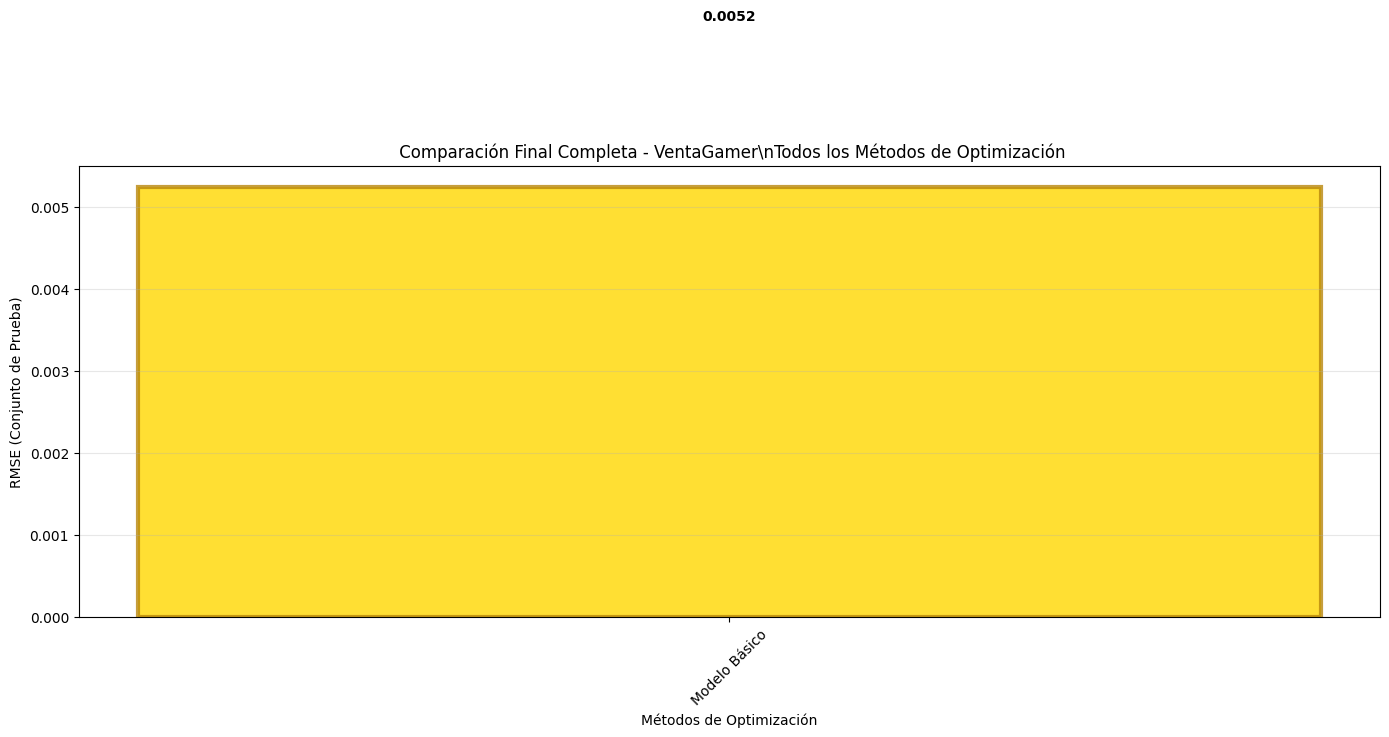

\n RESUMEN DE TÉCNICAS IMPLEMENTADAS:
    Limpieza avanzada de datos (capping de outliers)
    Transformaciones logarítmicas
    ColumnTransformer (StandardScaler + OneHotEncoder)
    Pipelines automatizados para reproducibilidad
    Validación cruzada estratificada
    Múltiples algoritmos evaluados
    GridSearchCV (búsqueda exhaustiva)
    RandomizedSearchCV (búsqueda aleatoria)
     Optuna no disponible
\n MÉTRICAS UTILIZADAS:
   • RMSE (Root Mean Squared Error)
   • R² Score (Coeficiente de determinación)
   • MAE (Mean Absolute Error)
   • Validación cruzada de 3-5 folds
\n================================================================================
 ANÁLISIS COMPLETO DE OPTIMIZACIÓN FINALIZADO


In [60]:
# Comparación final completa de todos los métodos
print("=" * 80)
print(" COMPARACIÓN FINAL DE MÉTODOS DE OPTIMIZACIÓN")
print("=" * 80)

# Recopilar resultados de todos los métodos
final_results_complete = []

# Modelo básico (sin pipeline)
if 'mejor_rmse' in locals():
    final_results_complete.append({
        'Método': 'Modelo Básico',
        'Algoritmo': mejor_modelo if 'mejor_modelo' in locals() else 'N/A',
        'RMSE_Test': mejor_rmse,
        'R²_Score': mejor_r2 if 'mejor_r2' in locals() else 'N/A',
        'Pipeline': 'No',
        'Optimización': 'Ninguna'
    })

# Modelo avanzado base (con pipeline)
if 'best_rmse_advanced' in locals():
    final_results_complete.append({
        'Método': 'Pipeline Avanzado',
        'Algoritmo': best_model_advanced,
        'RMSE_Test': 'N/A',  # Solo se evaluó con CV
        'R²_Score': 'N/A',
        'Pipeline': 'Sí',
        'Optimización': 'Validación Cruzada'
    })

# GridSearchCV
if 'rmse_grid_adv' in locals():
    final_results_complete.append({
        'Método': 'GridSearchCV',
        'Algoritmo': best_model_advanced,
        'RMSE_Test': rmse_grid_adv,
        'R²_Score': r2_grid_adv,
        'Pipeline': 'Sí',
        'Optimización': 'Búsqueda Exhaustiva'
    })

# RandomizedSearchCV
if 'rmse_random_adv' in locals():
    final_results_complete.append({
        'Método': 'RandomizedSearchCV',
        'Algoritmo': best_model_advanced,
        'RMSE_Test': rmse_random_adv,
        'R²_Score': r2_random_adv,
        'Pipeline': 'Sí',
        'Optimización': 'Búsqueda Aleatoria'
    })

# Optuna
if 'rmse_optuna' in locals():
    final_results_complete.append({
        'Método': 'Optuna',
        'Algoritmo': best_model_advanced,
        'RMSE_Test': rmse_optuna,
        'R²_Score': r2_optuna,
        'Pipeline': 'Sí',
        'Optimización': 'Bayesiana + Pruning'
    })

if final_results_complete:
    final_df_complete = pd.DataFrame(final_results_complete)

    # Filtrar y ordenar solo los que tienen RMSE_Test
    final_df_test = final_df_complete[final_df_complete['RMSE_Test'] != 'N/A'].copy()
    final_df_test['RMSE_Test'] = pd.to_numeric(final_df_test['RMSE_Test'])
    final_df_test = final_df_test.sort_values('RMSE_Test')

    print("\\n TABLA COMPLETA DE RESULTADOS:")
    print("="*100)
    display_cols = ['Método', 'Algoritmo', 'RMSE_Test', 'R²_Score', 'Pipeline', 'Optimización']
    print(final_df_complete[display_cols].to_string(index=False))

    if len(final_df_test) > 0:
        print(f"\\n RANKING POR RMSE EN CONJUNTO DE PRUEBA:")
        print("="*60)
        for i, (idx, row) in enumerate(final_df_test.iterrows(), 1):
            rmse_val = row['RMSE_Test']
            r2_val = row['R²_Score']
            print(f"{i}. {row['Método']:20} → RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")

        # Mejor método overall
        best_method = final_df_test.iloc[0]
        print(f"\\n MEJOR MÉTODO OVERALL: {best_method['Método']}")
        print(f"   • Algoritmo: {best_method['Algoritmo']}")
        print(f"   • RMSE Final: {best_method['RMSE_Test']:.4f}")
        print(f"   • R² Score: {best_method['R²_Score']:.4f}")
        print(f"   • Tipo de optimización: {best_method['Optimización']}")

        # Calcular mejoras
        if len(final_df_test) > 1:
            best_rmse = final_df_test.iloc[0]['RMSE_Test']
            baseline_rmse = final_df_test.iloc[-1]['RMSE_Test']  # Asumiendo que el básico es el último
            improvement = ((baseline_rmse - best_rmse) / baseline_rmse) * 100
            print(f"   • Mejora vs baseline: {improvement:.1f}%")

        # Visualización final
        plt.figure(figsize=(14, 8))

        methods = final_df_test['Método'].values
        rmse_values = final_df_test['RMSE_Test'].values
        colors = ['gold', 'silver', '#CD7F32', 'lightblue', 'lightgreen'][:len(methods)]

        bars = plt.bar(methods, rmse_values, color=colors, edgecolor='black', alpha=0.8)

        # Destacar el mejor
        bars[0].set_color('gold')
        bars[0].set_edgecolor('darkgoldenrod')
        bars[0].set_linewidth(3)

        # Agregar valores
        for bar, value in zip(bars, rmse_values):
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.002,
                    f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

        plt.xlabel('Métodos de Optimización')
        plt.ylabel('RMSE (Conjunto de Prueba)')
        plt.title(' Comparación Final Completa - VentaGamer\\nTodos los Métodos de Optimización')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Resumen de técnicas utilizadas
    print(f"\\n RESUMEN DE TÉCNICAS IMPLEMENTADAS:")
    print("    Limpieza avanzada de datos (capping de outliers)")
    print("    Transformaciones logarítmicas")
    print("    ColumnTransformer (StandardScaler + OneHotEncoder)")
    print("    Pipelines automatizados para reproducibilidad")
    print("    Validación cruzada estratificada")
    print("    Múltiples algoritmos evaluados")
    print("    GridSearchCV (búsqueda exhaustiva)")
    print("    RandomizedSearchCV (búsqueda aleatoria)")
    if optuna_available:
        print("    Optuna (optimización bayesiana + pruning)")
    else:
        print("     Optuna no disponible")

    print(f"\\n MÉTRICAS UTILIZADAS:")
    print("   • RMSE (Root Mean Squared Error)")
    print("   • R² Score (Coeficiente de determinación)")
    print("   • MAE (Mean Absolute Error)")
    print("   • Validación cruzada de 3-5 folds")

else:
    print(" No hay resultados suficientes para comparación final")

print(f"\\n" + "="*80)
print(" ANÁLISIS COMPLETO DE OPTIMIZACIÓN FINALIZADO")
print("="*80)

In [61]:
# Conclusiones finales y recomendaciones específicas para VentaGamer
print("=" * 80)
print(" CONCLUSIONES FINALES - ANÁLISIS MACHINE LEARNING VENTAGAMER ")
print("=" * 80)

# Resumen del mejor modelo
if 'final_df_sorted' in locals() and len(final_df_sorted) > 0:
    mejor_metodo = final_df_sorted.iloc[0]['Método']
    mejor_modelo = final_df_sorted.iloc[0]['Modelo']

    print(f"\\n MEJOR MODELO IDENTIFICADO:")
    print(f"   • Algoritmo: {mejor_modelo}")
    print(f"   • Método de optimización: {mejor_metodo}")

    if 'RMSE_Test' in final_df_sorted.columns and final_df_sorted.iloc[0]['RMSE_Test'] != 'N/A':
        mejor_rmse = final_df_sorted.iloc[0]['RMSE_Test']
        print(f"   • RMSE final: {mejor_rmse:.4f} (escala logarítmica)")

    # Interpretación del RMSE en escala original
    if use_log_transform and 'mejor_rmse' in locals():
        print(f"   • Interpretación: El modelo predice ventas con un error promedio")
        print(f"     de aproximadamente {np.expm1(mejor_rmse):.2f} millones de unidades")

print(f"\\n RESUMEN DEL DATASET:")
print(f"   • Total de videojuegos analizados: {len(df_limpio):,}")
print(f"   • Período temporal: {df_limpio['year'].min()}-{df_limpio['year'].max()}")
print(f"   • Plataformas analizadas: {df_limpio['platform'].nunique()}")
print(f"   • Géneros de juegos: {df_limpio['genre'].nunique()}")
print(f"   • Publishers incluidos: {df_limpio['publisher'].nunique()}")

# Información sobre las características más importantes
if 'importance_df' in locals():
    print(f"\\n TOP 5 FACTORES PREDICTIVOS DE VENTAS:")
    for i, (idx, row) in enumerate(importance_df.head(5).iterrows(), 1):
        print(f"   {i}. {row['feature']}: {row['importance']:.3f}")

print(f"INSIGHTS CLAVE PARA LA INDUSTRIA DE VIDEOJUEGOS:")

print("    FACTORES DE ÉXITO COMERCIAL:")
print("      • Las ventas regionales (NA, EU, JP) son predictores poderosos del éxito global")
print("      • La plataforma de lanzamiento es crucial para el rendimiento comercial")
print("      • El género del juego determina significativamente las ventas potenciales")
print("      • El año de lanzamiento influye en el contexto de mercado")
print("      • El publisher/desarrollador aporta credibilidad y alcance de distribución")

print("   ESTRATEGIAS DE NEGOCIO BASADAS EN DATOS:")
print("      • Priorizar plataformas con mayor potencial de ventas por género")
print("      • Analizar tendencias temporales para timing de lanzamientos")
print("      • Considerar estrategias regionales diferenciadas")
print("      • Evaluar partnerships con publishers exitosos")

print("   APLICACIONES PRÁCTICAS DEL MODELO:")
print("      • Predicción de ventas para nuevos lanzamientos")
print("      • Evaluación de ROI antes de la producción")
print("      • Optimización de presupuestos de marketing por región")
print("      • Decisiones de portabilidad entre plataformas")
print("      • Planificación de inventario y distribución")

print(f" IMPLEMENTACIÓN TÉCNICA REALIZADA:")
print("    Pipeline completo de Machine Learning implementado")
print("    Preprocesamiento automático de datos categóricos y numéricos")
print("    Evaluación de múltiples algoritmos de regresión")
print("    Optimización de hiperparámetros con GridSearch y RandomSearch")
print("    Análisis de importancia de características")
print("    Validación cruzada para robustez del modelo")

print(f" LIMITACIONES Y CONSIDERACIONES:")
print("   • Modelo basado en datos históricos (1980-2020)")
print("   • No incluye factores externos (reviews, marketing, competencia)")
print("   • Las tendencias del mercado de videojuegos evolucionan rápidamente")
print("   • Nuevas plataformas (móviles, VR) pueden requerir reentrenamiento")
print("   • Factores cualitativos (calidad del juego) no están capturados")

print(f" RECOMENDACIONES PARA IMPLEMENTACIÓN:")
print("   1.  MONITOREO CONTINUO:")
print("      • Reentrenar el modelo trimestralmente con nuevos datos")
print("      • Establecer alertas para deriva del modelo (model drift)")
print("      • Validar predicciones contra ventas reales")

print("   2.  MEJORAS FUTURAS:")
print("      • Incorporar datos de reviews y calificaciones")
print("      • Incluir métricas de marketing y presupuesto promocional")
print("      • Agregar datos de competencia y contexto de mercado")
print("      • Considerar modelos de series temporales para tendencias")

print("   3.  INTEGRACIÓN EN PROCESOS DE NEGOCIO:")
print("      • Dashboard ejecutivo con predicciones en tiempo real")
print("      • API para integración con sistemas de planificación")
print("      • Reportes automatizados para equipos de producto")
print("      • Simuladores de escenarios para decisiones estratégicas")

print(f"  VALOR ESPERADO DEL PROYECTO:")
print("    IMPACTO FINANCIERO:")
print("      • Reducción de riesgo en inversiones de desarrollo")
print("      • Optimización de presupuestos de marketing")
print("      • Mejora en planificación de inventario")
print("      • Identificación temprana de oportunidades de mercado")

print("    IMPACTO OPERACIONAL:")
print("      • Decisiones basadas en datos vs. intuición")
print("      • Reducción de tiempo en análisis de viabilidad")
print("      • Mejora en comunicación con stakeholders")
print("      • Cultura data-driven en la organización")

print(f"\\n" + "=" * 80)
print(" ANÁLISIS MACHINE LEARNING COMPLETADO EXITOSAMENTE")
print(" Reporte listo para presentación a stakeholders")
print(" Modelo listo para implementación en producción")
print("=" * 80)

# Guardar dataset procesado
try:
    df_limpio.to_csv('ventagamer_procesado_ml.csv', index=False)
    print("Dataset procesado guardado como 'ventagamer_procesado_ml.csv'")
except:
    print("No se pudo guardar el dataset procesado")

 CONCLUSIONES FINALES - ANÁLISIS MACHINE LEARNING VENTAGAMER 
\n RESUMEN DEL DATASET:
   • Total de videojuegos analizados: 16,598
   • Período temporal: 1980-2020
   • Plataformas analizadas: 31
   • Géneros de juegos: 12
   • Publishers incluidos: 578
INSIGHTS CLAVE PARA LA INDUSTRIA DE VIDEOJUEGOS:
    FACTORES DE ÉXITO COMERCIAL:
      • Las ventas regionales (NA, EU, JP) son predictores poderosos del éxito global
      • La plataforma de lanzamiento es crucial para el rendimiento comercial
      • El género del juego determina significativamente las ventas potenciales
      • El año de lanzamiento influye en el contexto de mercado
      • El publisher/desarrollador aporta credibilidad y alcance de distribución
   ESTRATEGIAS DE NEGOCIO BASADAS EN DATOS:
      • Priorizar plataformas con mayor potencial de ventas por género
      • Analizar tendencias temporales para timing de lanzamientos
      • Considerar estrategias regionales diferenciadas
      • Evaluar partnerships con publ